## Homework 1

## Installing dependencies

> **The submission (zip file) consists of the notebook.ipynb + trace1 ... traceN.nc files** (file, export project as ZIP)

## Estimating Purchases

In [1]:
%matplotlib inline

import io
import warnings; warnings.filterwarnings('ignore')

import arviz as az
import pymc as pm
import pandas as pd
import pytensor.tensor as pt
import matplotlib.pyplot as plt


az.style.use('arviz-darkgrid')

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


You have raw purchase data (**obs**) from three grocery stores (**store**) for the same product (zero means a customer did not buy the product). Groceries are of different size so number of observations are different. You need to compare which grocery is more efficient in sales.


1. (5 pt) Propose and motivate a likelihood for the problem
    * likelihood with negative support = -5 points
2. (10 pt) Propose and motivate a probabilistic model (non-hierarchical) for the problem. Some parameters may be shared, some independent if you want.
    0. (2.5 pt) Write LaTeX equation for the model (displaying model is ok)
    1. (2.5 pt) Motivate priors, under the only assumption that purchases are at orders of 100s and no more than 500
    2. (2.5 pt) Make a prior predictive check to confirm your choice
    3. (2.5 pt) Sample from the model, plot traces compare it with prior, comment on it (e.g. infulence of data size).
    4. **total score for the section is multiplied by (1 - divergent samples / total samples)**
    5. Save trace into traceN.nc
3. (10 pt) Propose a hierarchical model for the problem. Put hierarchy on only one model parameter (you choose which one, prefer mean)
    
    same as 2.
    
4. (10 pt) Propose a hierarchical model for the problem. Put hierarchy on 2 model parameters (you choose which additional one, prefer p)
    
    same as 2

5. (5 pt) Perform a model comparison study (look into [`az.compare`](https://arviz-devs.github.io/arviz/api/generated/arviz.compare.html)), you can use the models you have (at least 2)
    1. Interpret the result and choose the model, elaborate on warnings
6. (5 pt) Business Metric (bonus)
    1. Propose and motivate a comparison metric between groceries to say (A is better than B)
    2. Evaluate the metric on the the best model you have
7. (5 pt) Make a prediction for a new store, you need model from (4) (bonus)

(max 40 pt)

**Important**
> Use quoting for the main points of your solution

In [2]:
raw_data = io.StringIO(
    initial_value="""
obs,store\n117,0\n0,0\n0,0\n134,0\n0,0\n0,0\n0,0\n0,0\n122,0\n0,0\n108,0\n0,0\n0,0\n0,0\n0,0\n124,0\n0,0\n0,0\n113,0\n118,0\n0,0\n105,0\n114,0\n0,0\n118,0\n106,0\n0,0\n100,0\n0,0\n0,0\n123,0\n0,0\n0,0\n0,0\n0,0\n129,0\n0,0\n117,0\n0,0\n0,0\n0,0\n0,0\n0,0\n115,0\n123,0\n0,0\n0,0\n0,0\n137,0\n0,0\n0,0\n0,0\n0,0\n0,0\n136,0\n0,0\n107,0\n0,0\n0,0\n0,0\n0,0\n115,0\n118,0\n0,0\n105,0\n105,0\n97,0\n121,0\n0,0\n0,0\n0,0\n124,0\n114,0\n0,0\n101,0\n0,0\n0,0\n0,0\n121,0\n0,0\n0,0\n0,0\n119,0\n0,0\n108,0\n121,0\n0,0\n0,0\n116,0\n0,0\n0,0\n0,0\n0,0\n0,0\n0,0\n0,0\n127,0\n0,0\n0,0\n106,0\n0,0\n0,0\n0,0\n131,0\n0,0\n0,0\n128,0\n122,0\n0,0\n0,0\n0,0\n0,0\n0,0\n0,0\n102,0\n119,0\n0,0\n0,0\n0,0\n123,0\n0,0\n0,0\n0,0\n120,0\n0,1\n0,1\n0,1\n0,1\n0,1\n121,1\n0,1\n0,1\n0,1\n123,1\n0,1\n106,1\n0,1\n0,1\n0,1\n0,1\n0,1\n0,1\n0,1\n0,1\n0,1\n0,1\n0,1\n0,1\n0,1\n0,1\n0,1\n0,1\n0,1\n0,1\n0,1\n142,1\n0,1\n0,1\n0,1\n131,1\n0,1\n0,1\n0,1\n0,1\n0,1\n0,1\n0,1\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n81,2\n0,2\n0,2\n73,2\n0,2\n0,2\n0,2\n69,2\n0,2\n94,2\n0,2\n91,2\n0,2\n0,2\n98,2\n0,2\n79,2\n90,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n102,2\n0,2\n87,2\n0,2\n81,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n86,2\n97,2\n0,2\n0,2\n0,2\n76,2\n0,2\n83,2\n0,2\n0,2\n88,2\n0,2\n86,2\n0,2\n0,2\n99,2\n0,2\n0,2\n86,2\n86,2\n0,2\n93,2\n0,2\n0,2\n0,2\n90,2\n0,2\n81,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n91,2\n0,2\n0,2\n67,2\n107,2\n0,2\n0,2\n0,2\n0,2\n101,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n75,2\n112,2\n0,2\n0,2\n0,2\n0,2\n0,2\n91,2\n0,2\n0,2\n0,2\n81,2\n108,2\n92,2\n0,2\n0,2\n0,2\n90,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n93,2\n0,2\n0,2\n0,2\n96,2\n0,2\n0,2\n0,2\n0,2\n94,2\n0,2\n90,2\n0,2\n0,2\n0,2\n0,2\n94,2\n0,2\n0,2\n0,2\n0,2\n72,2\n0,2\n97,2\n0,2\n82,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n105,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n99,2\n90,2\n0,2\n76,2\n92,2\n0,2\n0,2\n0,2\n0,2\n0,2\n100,2\n113,2\n0,2\n0,2\n0,2\n100,2\n0,2\n91,2\n0,2\n88,2\n0,2\n0,2\n0,2\n83,2\n0,2\n0,2\n82,2\n0,2\n84,2\n101,2\n0,2\n0,2\n0,2\n0,2\n102,2\n0,2\n0,2\n0,2\n99,2\n91,2\n0,2\n95,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n73,2\n0,2\n80,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n90,2\n0,2\n0,2\n0,2\n0,2\n95,2\n0,2\n91,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n92,2\n0,2\n0,2\n97,2\n70,2\n102,2\n0,2\n0,2\n0,2\n87,2\n111,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n73,2\n79,2\n99,2\n0,2\n0,2\n88,2\n88,2\n0,2\n0,2\n94,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n94,2\n0,2\n88,2\n0,2\n0,2\n0,2\n0,2\n0,2\n80,2\n90,2\n0,2\n0,2\n0,2\n87,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n105,2\n0,2\n0,2\n88,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n71,2\n0,2\n103,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n96,2\n0,2\n0,2\n0,2\n94,2\n0,2\n79,2\n110,2\n0,2\n0,2\n0,2\n90,2\n0,2\n0,2\n0,2\n101,2\n0,2\n95,2\n94,2\n0,2\n0,2\n0,2\n0,2\n0,2\n85,2\n0,2\n100,2\n92,2\n0,2\n0,2\n0,2\n110,2\n0,2\n0,2\n0,2\n0,2\n78,2\n0,2\n74,2\n0,2\n103,2\n0,2\n0,2\n0,2\n0,2\n90,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n90,2\n105,2\n0,2\n0,2\n0,2\n103,2\n0,2\n0,2\n0,2\n0,2\n98,2\n89,2\n105,2\n0,2\n0,2\n93,2\n0,2\n93,2\n0,2\n0,2\n0,2\n0,2\n88,2\n88,2\n0,2\n0,2\n91,2\n0,2\n89,2\n0,2\n0,2\n100,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n75,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n85,2\n0,2\n83,2\n0,2\n0,2\n80,2\n0,2\n0,2\n0,2\n0,2\n89,2\n0,2\n0,2\n76,2\n0,2\n89,2\n0,2\n0,2\n0,2\n0,2\n0,2\n88,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n101,2\n0,2\n112,2\n92,2\n0,2\n0,2\n0,2\n0,2\n0,2\n93,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n95,2\n0,2\n0,2\n94,2\n0,2\n0,2\n0,2\n0,2\n0,2\n104,2\n0,2\n89,2\n0,2\n88,2\n0,2\n0,2\n0,2\n0,2\n86,2\n82,2\n0,2\n0,2\n0,2\n0,2\n0,2\n91,2\n0,2\n83,2\n0,2\n81,2\n0,2\n0,2\n87,2\n0,2\n0,2\n0,2\n83,2\n0,2\n94,2\n0,2\n0,2\n81,2\n0,2\n0,2\n0,2\n87,2\n0,2\n0,2\n108,2\n
"""
)
data = pd.read_csv(raw_data)

traces = {}

In [3]:
data.head(5)

obs  store
0  117      0
1    0      0
2    0      0
3  134      0
4    0      0

## 1. Data description
1. Propose and motivate a likelihood for the problem

> Samping
$$z \sim Bernoulli(p)$$
$$y \sim 
\begin{cases}
  0, z = 0 \\
  Normal(\mu, \sigma), z = 1 \\
\end{cases}
$$

> Log Probability Density Function
$$\log p(x|p, \mu, \sigma) = 
\begin{cases}
    log(1 - p), x = 0 \\
    log(p) -\frac{{(x - \mu)^2}}{{2\sigma^2}} - \log(\sigma\sqrt{2\pi}), x > 0 \\
\end{cases}
$$

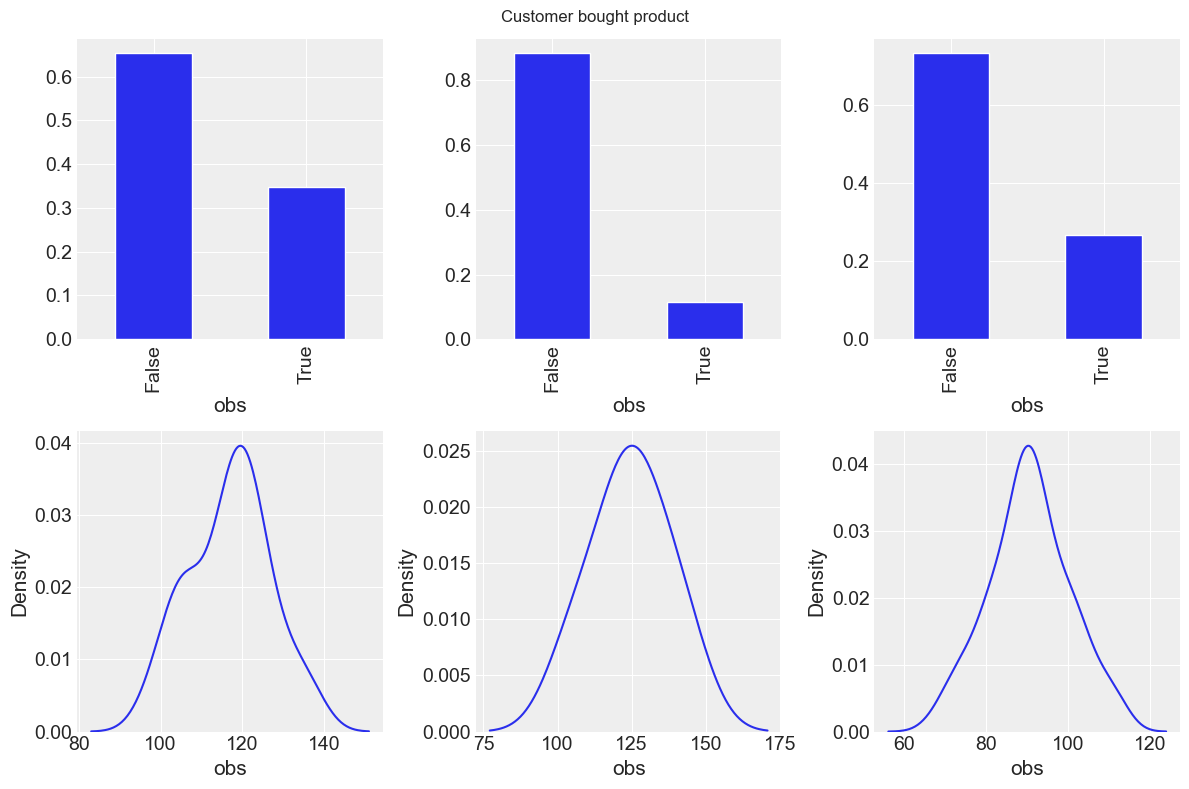

In [4]:
import seaborn as sns

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=[12, 8])
plt.suptitle('Customer bought product')
data[data.store == 0].obs.gt(0).value_counts(normalize=True).plot.bar(ax=axes[0, 0])
data[data.store == 1].obs.gt(0).value_counts(normalize=True).plot.bar(ax=axes[0, 1])
data[data.store == 2].obs.gt(0).value_counts(normalize=True).plot.bar(ax=axes[0, 2])

sns.kdeplot(data=data[(data.store == 0) & (data.obs != 0)], x='obs', ax=axes[1, 0])
sns.kdeplot(data=data[(data.store == 1) & (data.obs != 0)], x='obs', ax=axes[1, 1])
sns.kdeplot(data=data[(data.store == 2) & (data.obs != 0)], x='obs', ax=axes[1, 2])

plt.tight_layout()
plt.show()

## 2. Probabilistic model

2. Propose and motivate a probabilistic model (non-hierarchical) for the problem. Some parameters may be shared, some independent if you want.
    
    0. Write LaTeX equation for the model (displaying latex model is ok)
    1. Motivate priors, under the only assumption that purchases are at orders of 100s and no more than 500
    2. Make a prior predictive check to confirm your choice
    3. Sample from the model, plot traces compare it with prior, comment on it (e.g. infulence of data size).

**hints:**

1. explore `pt.stack` to fix shape issues with mixture probability, (if you use mixtures)
2. visit 2d seminar

__Вероятность покупки.__

> Показатель p обозначает вероятность покупки и представляет собой случайную величину, принимающую значения из интервала [0, 1]. Исходя из наблюдаемых паттернов, можно сделать предположение, что покупатели, скорее всего, склонны к более редким покупкам, предпочитая более активные действия, такие как просмотр, знакомство с продуктом и тому подобное. Для моделирования такого смещения распределения вероятности покупки влево предлагается использовать параметрическое распределение LigitNormal(-1, 1), так как оно отражает данное требование в анализе данных в экономике.

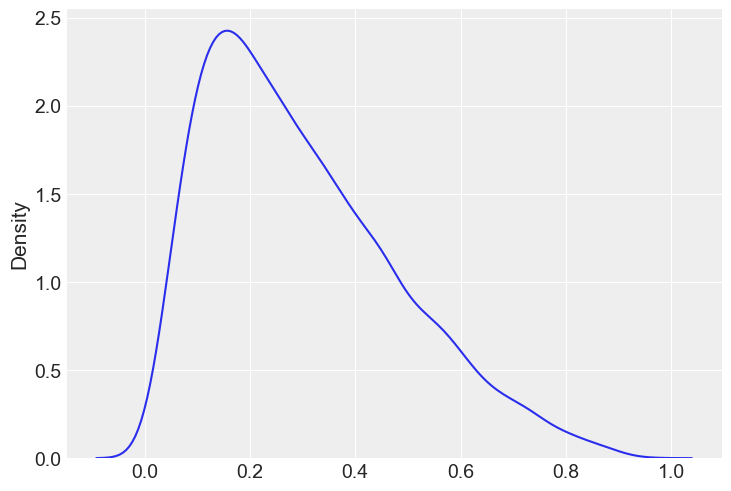

In [5]:
sns.kdeplot(pm.LogitNormal.dist(mu=-1, sigma=1, size=5000).eval());

__Средний объем покупки.__

> Согласно поставленной задаче _("Motivate priors, under the only assumption that `purchases are at orders of 100s` and no more than 500")_, мы примем предположение о среднем значении, равном 100. Для определения априорного распределения среднего значения, мы рассмотрим семейство нормальных распределений, в котором среднее значение устанавливается равным 100 в соответствии с условиями задачи. Стандартное отклонение этого априорного распределения будет соответствовать стандартному отклонению средних значений между магазинами. Это значение представляется оптимальной оценкой данного параметра.

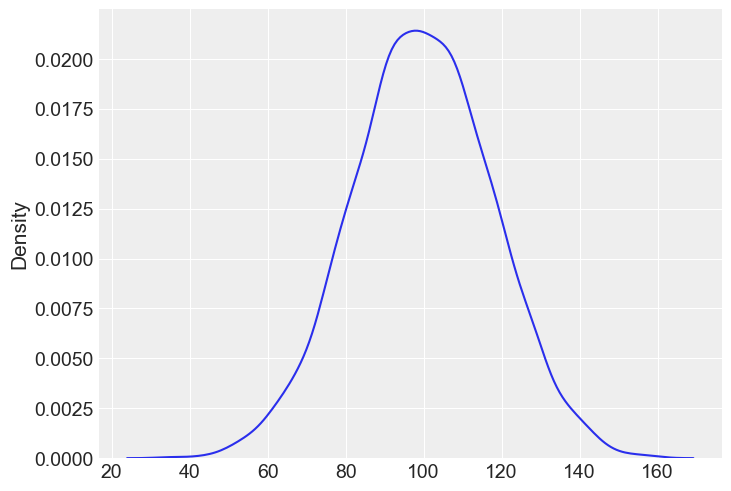

In [6]:
sns.kdeplot(pm.Normal.dist(mu=100, sigma=data[data.obs != 0].groupby(by='store').obs.mean().std(), size=5000).eval());

> Также можно было бы использовать среднее по всем покупкам (вместо данного по условию = 100)

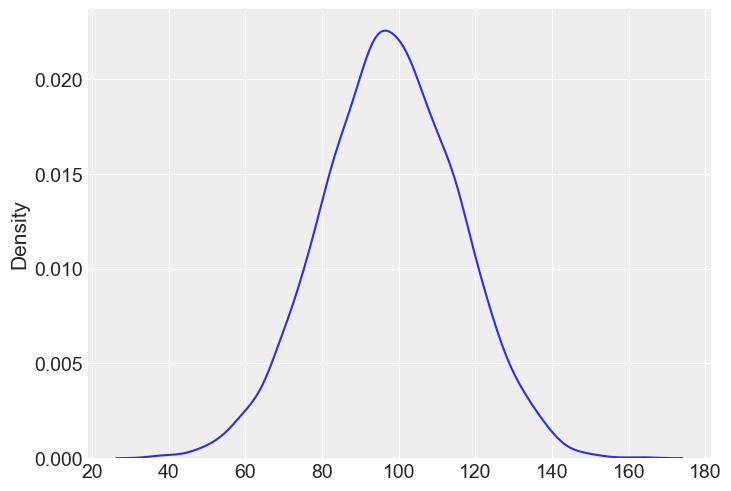

In [7]:
sns.kdeplot(pm.Normal.dist(mu=data[data.obs != 0].obs.mean(), sigma=data[data.obs != 0].groupby(by='store').obs.mean().std(), size=5000).eval());


__Стандартное отклонение объема покупки.__

> "Motivate priors, under the only assumption that purchases are at orders of 100s and `no more than 500`. Это условие не накладывает больших ограничение на выбор $\sigma$ (примерно $\mu + 3 \sigma < 500, \sigma < 100$). Будем выбирать ее из семейства распределение HalfNormal(5). Данное распределение кажется релевантным, поскольку его значения лежат в интервале, включающим значение стандартного отклонения по всем покупкам. А так же данное распределение всегда больше нуля.

In [8]:
data[data.obs != 0].obs.std()

15.440944306978434

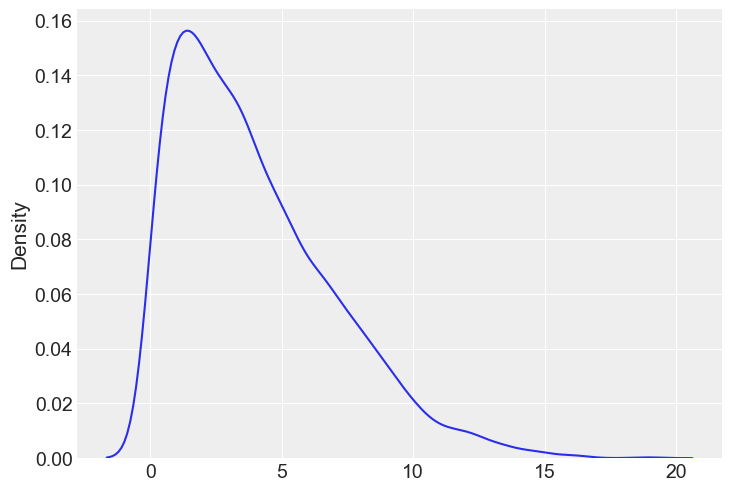

In [9]:
sns.kdeplot(pm.HalfNormal.dist(sigma=5, size=5000).eval());

> Здесь и далее будут использоваться эти предположения об априорных функциях (с тем же обоснованием)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p, μ, σ]


Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 4 seconds.
Sampling: [p, y, μ, σ]


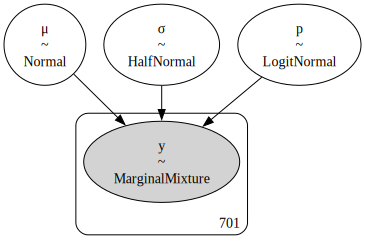

In [10]:
with pm.Model() as model_no_hierarchy:
    # vars
    p = pm.LogitNormal(name='p', mu=-1, sigma=1)
    μ = pm.Normal(name='μ', mu=100, sigma=data[data.obs != 0].groupby(by='store').obs.mean().std())
    σ = pm.HalfNormal(name='σ', sigma=5)
    
    # prior
    w = pt.stack([1 - p, p], axis=1)
    a = pm.DiracDelta.dist(c=float(0))
    b = pm.Normal.dist(mu=μ, sigma=σ)
    
    # likelihood
    y = pm.Mixture(name='y', w=w, comp_dists=[a, b], observed=data.obs, 
                   transform=pm.distributions.transforms.Interval(lower=0, upper=500))
    
    # posterior distribution
    trace = pm.sample(3000, random_seed=1234, target_accept=0.95, idata_kwargs={'log_likelihood': True})
    trace.extend(pm.sample_prior_predictive())
    trace.to_netcdf('trace_no_hierarchy.nc')
    traces['no_hierarchy'] = trace

pm.model_to_graphviz(model_no_hierarchy)

In [11]:
model_no_hierarchy

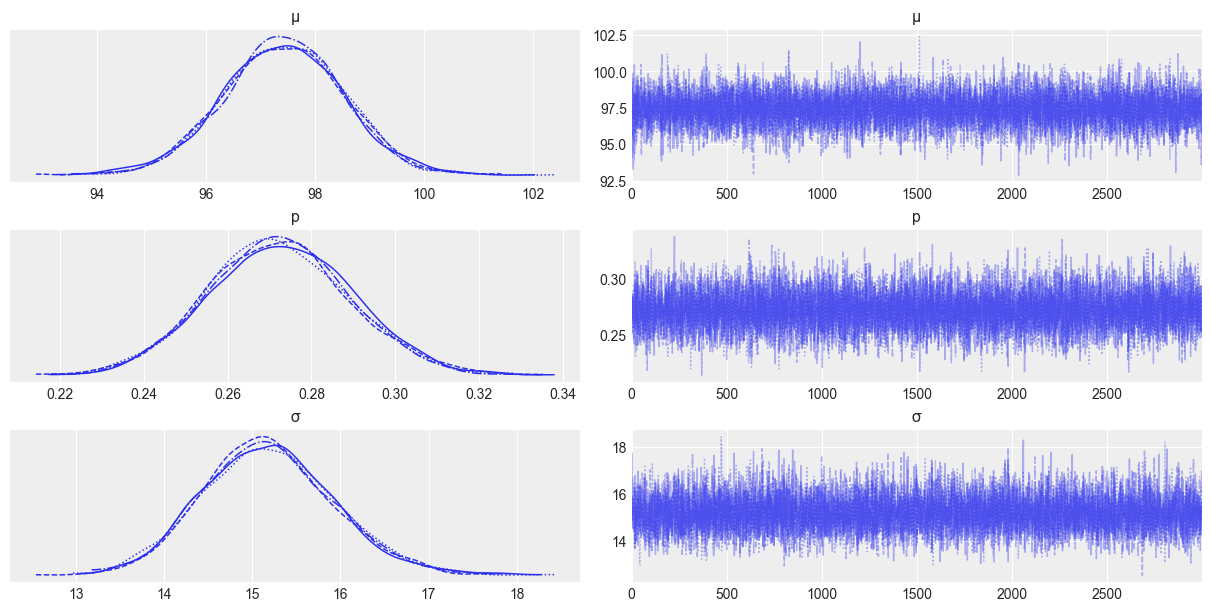

In [12]:
az.plot_trace(trace);

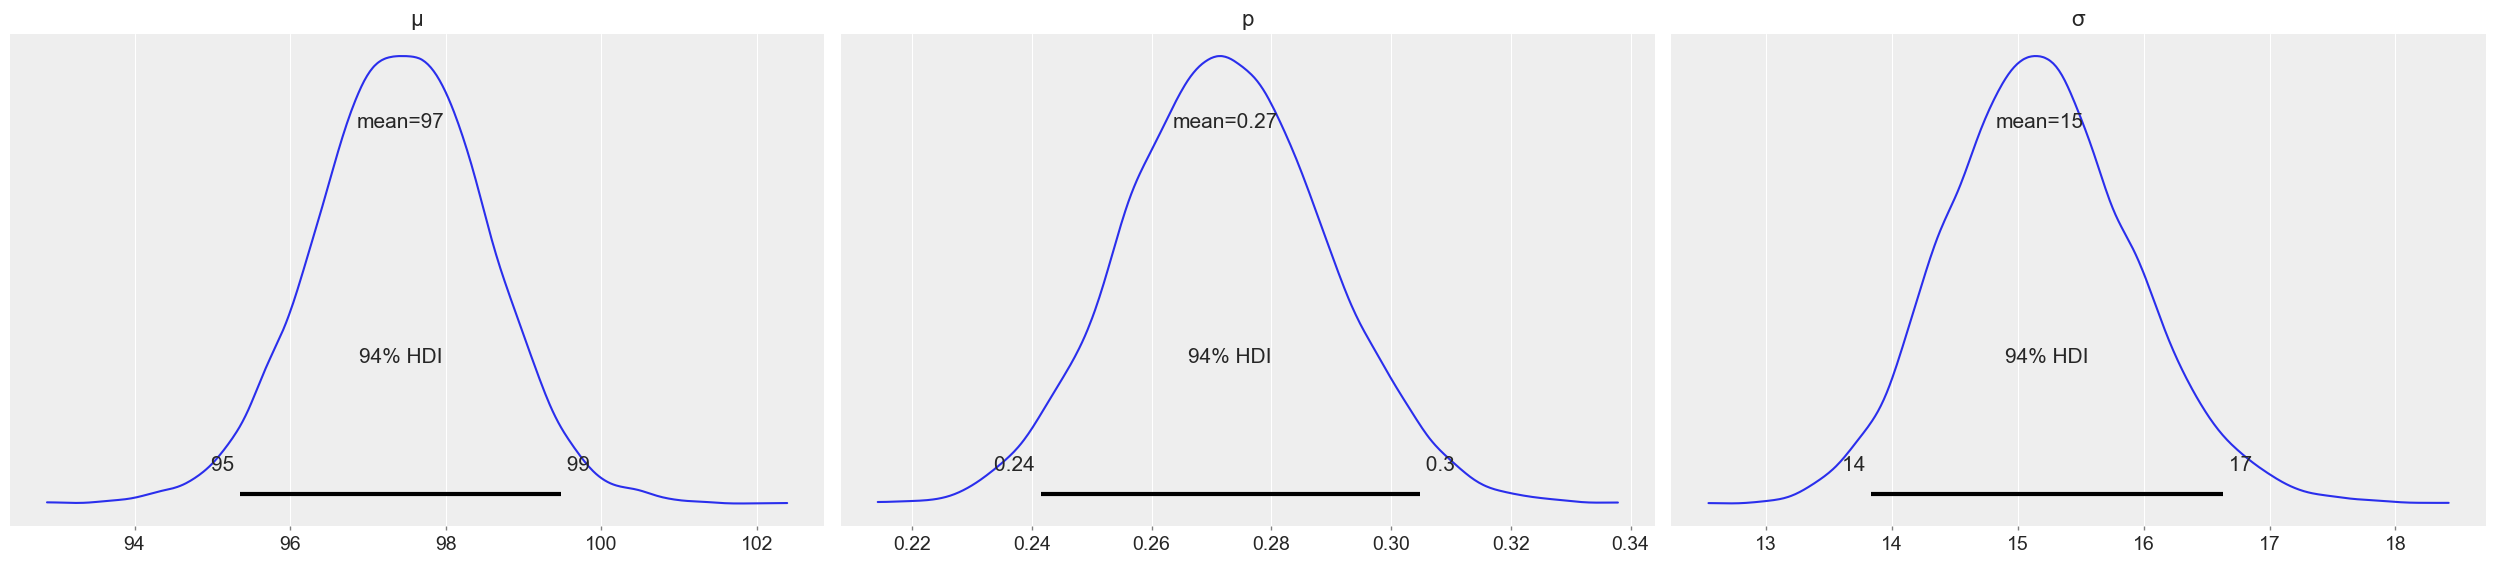

In [13]:
az.plot_posterior(trace);

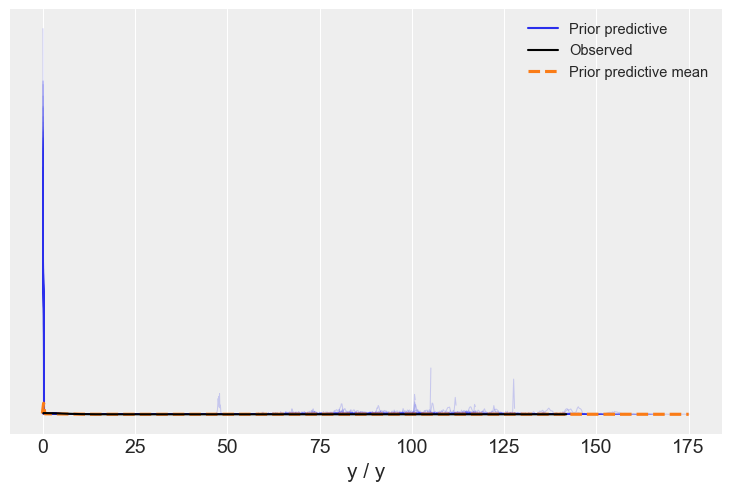

In [14]:
az.plot_ppc(trace, group='prior');

> Есть выбросы, наборы наблюдений, в которых наблюдается высокая доля отказа от покупки. Тем не менее среднее значение наблюдаемой переменной соотвесвует нашим ожиданиям. Среднее находится в районе 100 и не превышает 500. Посмотрим на средние значения 

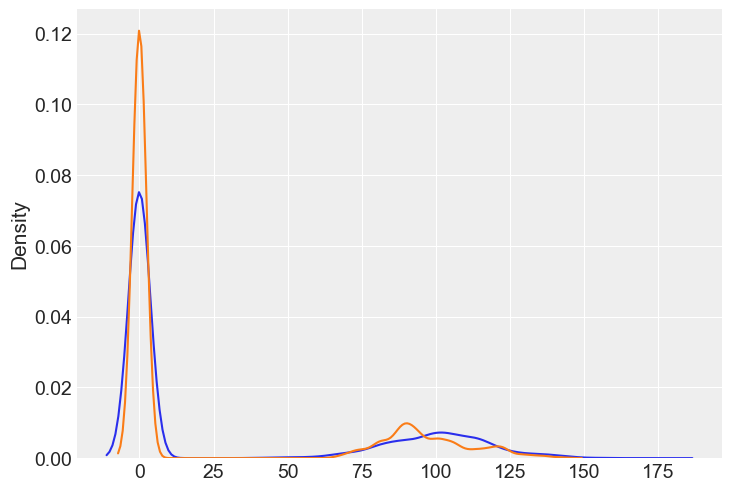

In [15]:
import numpy as np
sns.kdeplot(trace.prior_predictive.y.to_numpy().ravel())
sns.kdeplot(np.repeat(trace.observed_data.y.to_numpy(), repeats=3000));

Распределения похожи, однако наблдается, более низкая доля отказа от покупок (в сравнении с наблюдаемыми данными)

In [16]:
trace.prior_predictive.y.min()

<xarray.DataArray 'y' ()>
array(0.)

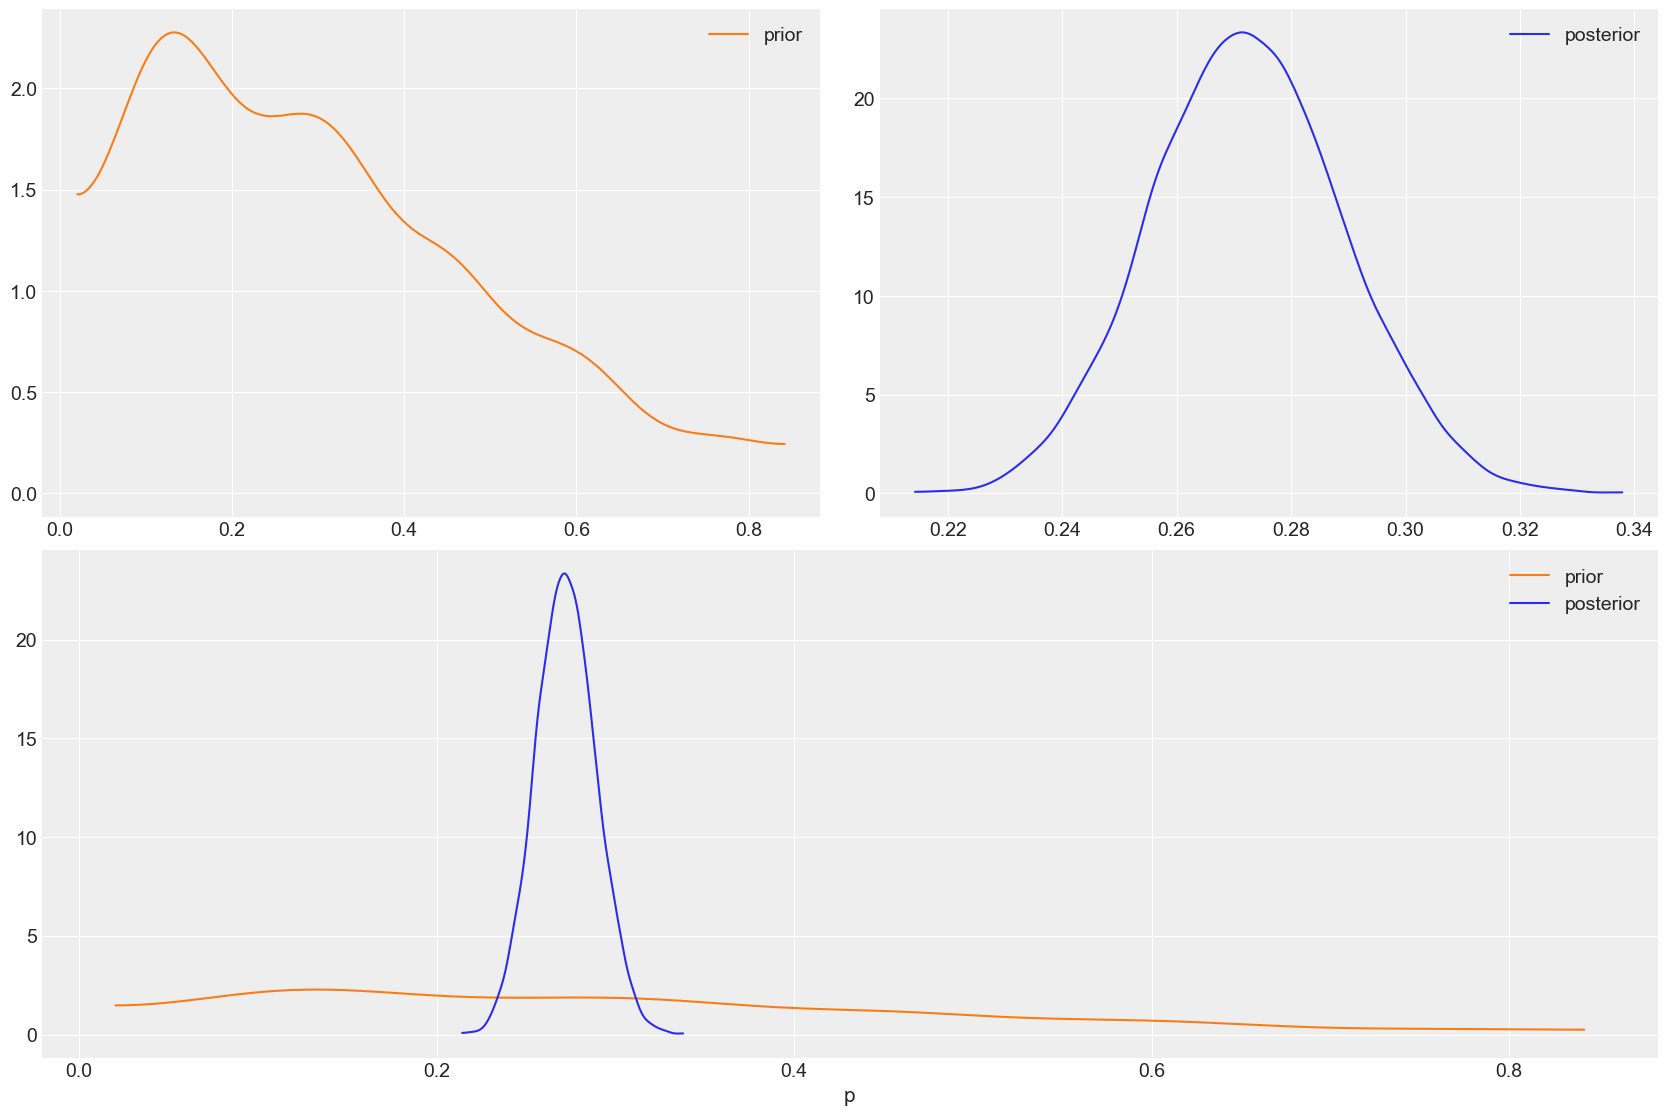

In [17]:
az.plot_dist_comparison(trace, var_names=['p']);

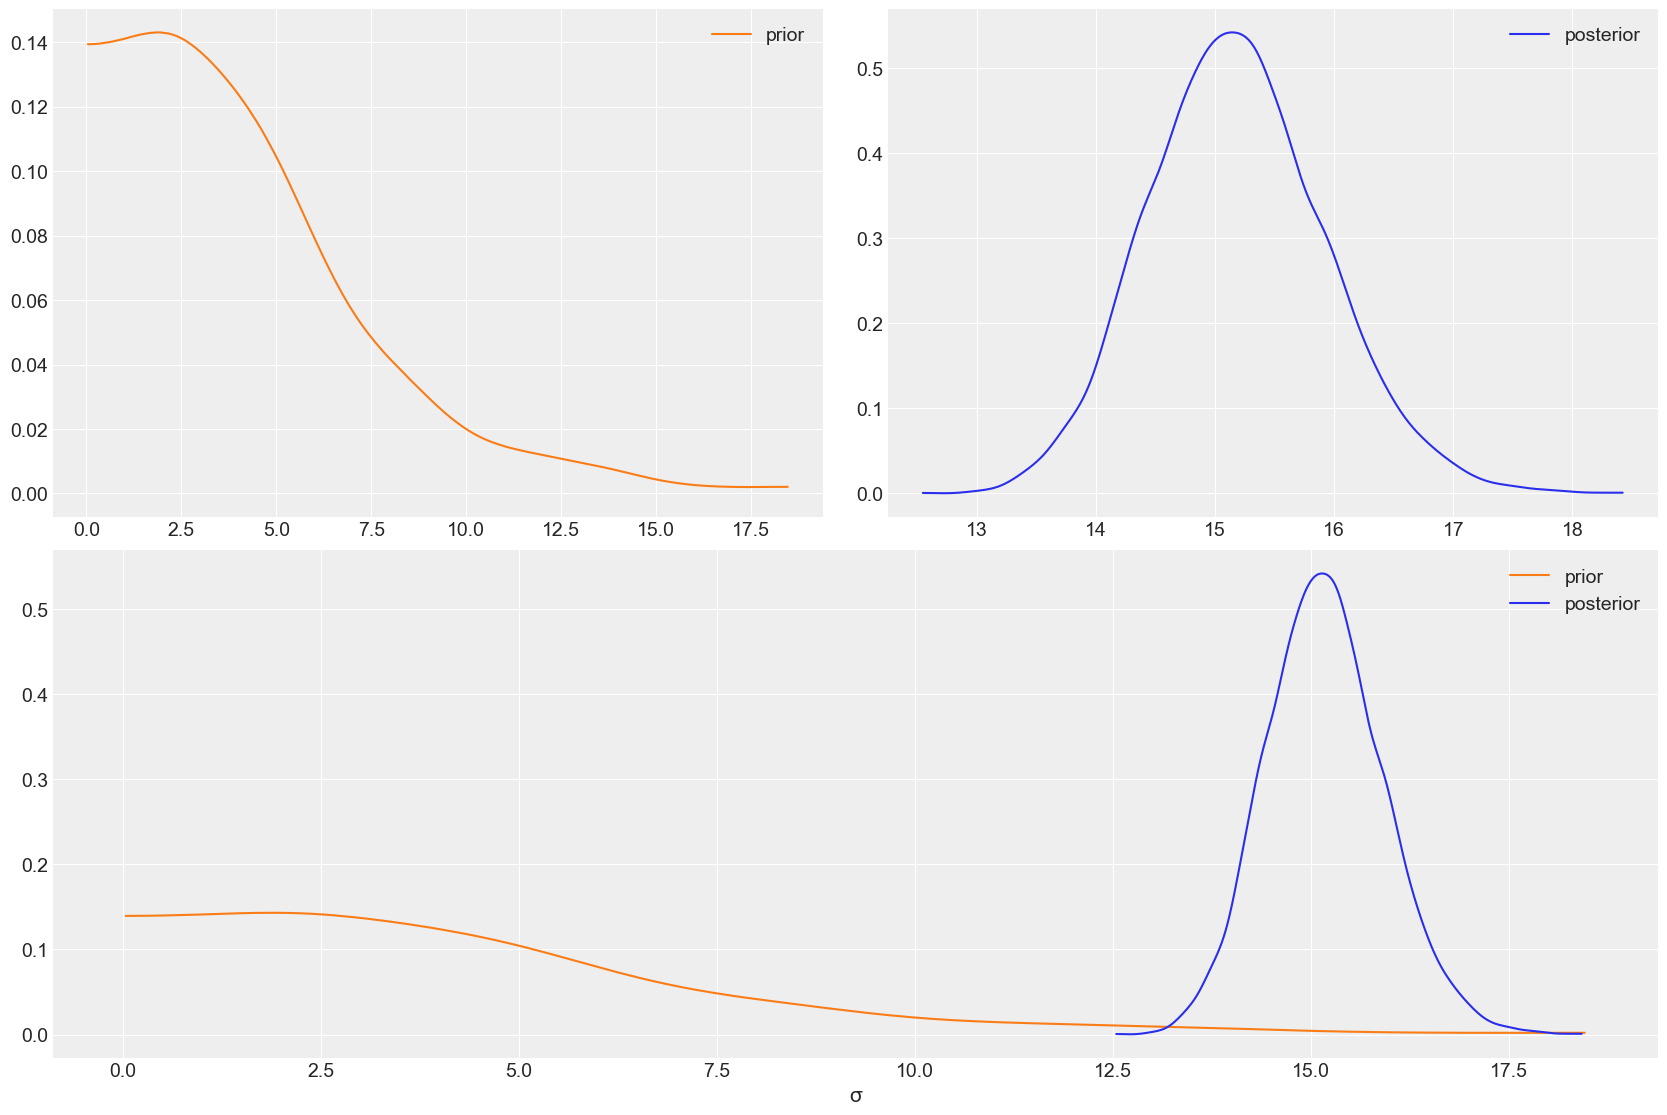

In [18]:
az.plot_dist_comparison(trace, var_names=['σ']);

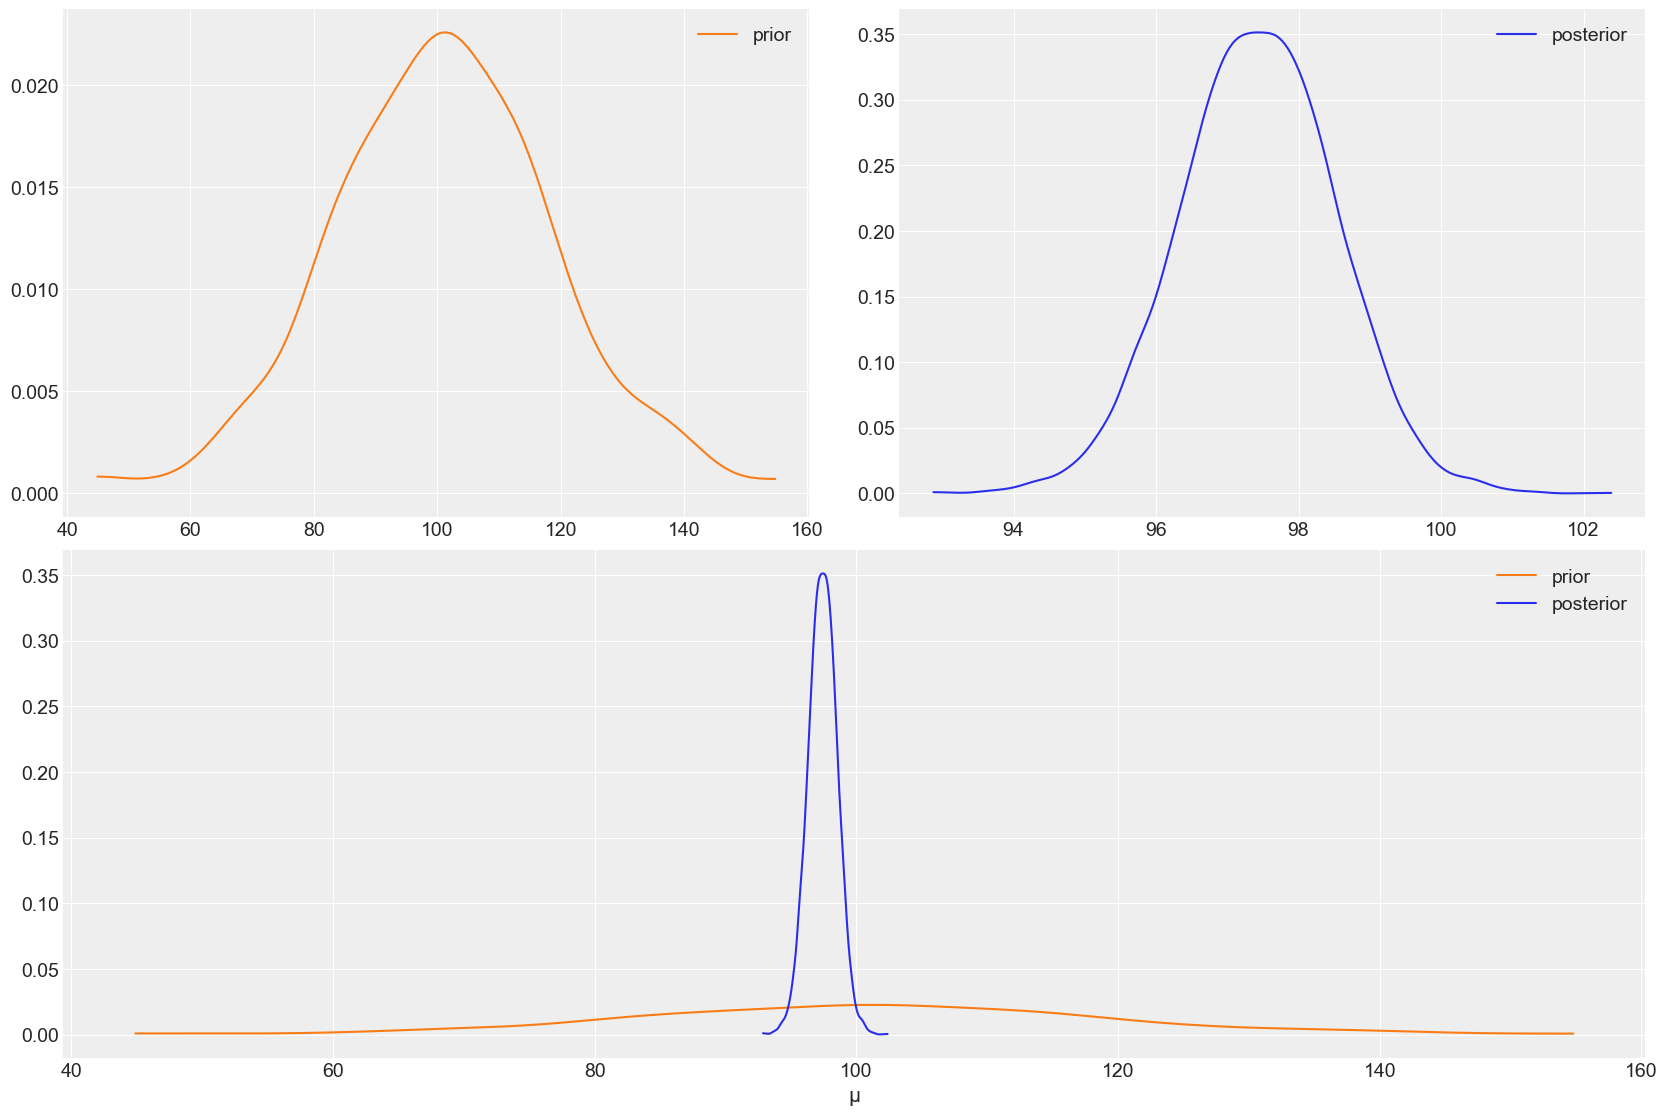

In [19]:
az.plot_dist_comparison(trace, var_names=['μ']);

> априорные и постериорные распределения пересекаются (этого достаточно). Различия в форме распределений обусловлены теми предпослыками, которые были выдвинуты в процессе подбора априорных распределений.

## 3. Hierarchical Model (1 parameter)
3. Propose a hierarchical model for the problem. Put hierarchy on only one model parameter (you choose which one, prefer mean)

**hints:**

1. Use non centered parametrization
2. Use pm.Deterministic to track reparametrized parameters

__Non-centered parametrization__

Выберем параметр из семейства стандартных нормальных распределений.

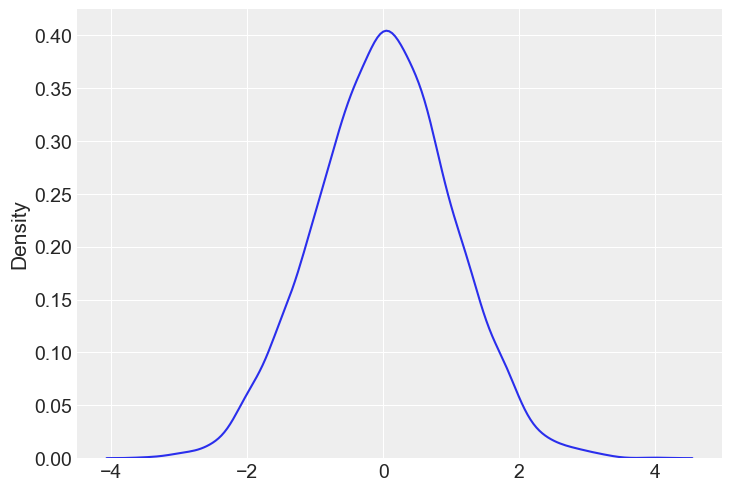

In [20]:
sns.kdeplot(pm.Normal.dist(mu=0, sigma=1, size=5000).eval());

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [z, p, σ]


Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 4 seconds.
Sampling: [p, y, z, σ]


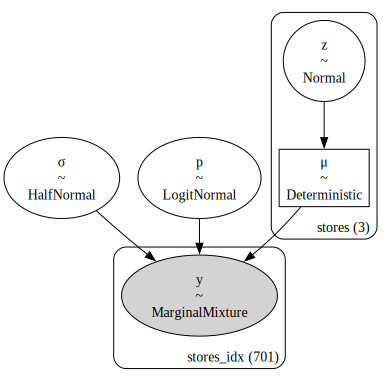

In [21]:
stores_idx, stores = pd.factorize(data.store)

with pm.Model(coords={'stores_idx': stores_idx, 'stores': stores}) as model_hierarchy_1_param:
    # other
    z = pm.Normal(name='z', mu=0, sigma=1, dims='stores')

    # vars
    p = pm.LogitNormal(name='p', mu=-1, sigma=1)
    μ = pm.Deterministic(name='μ', dims='stores', var=100 + z * data[data.obs != 0].groupby(by='store').obs.mean().std())
    σ = pm.HalfNormal(name='σ', sigma=5)
    
    # prior
    w = pt.stack([1 - p, p], axis=1)
    a = pm.DiracDelta.dist(c=float(0))
    b = pm.Normal.dist(mu=μ[stores_idx], sigma=σ)
    
    # likelihood
    y = pm.Mixture(name='y', w=w, comp_dists=[a, b], observed=data.obs, dims='stores_idx', 
                   transform=pm.distributions.transforms.Interval(lower=0, upper=500))
    
    # posterior distribution
    trace = pm.sample(3000, random_seed=1234, target_accept=0.95, idata_kwargs={'log_likelihood': True})
    trace.extend(pm.sample_prior_predictive())
    trace.to_netcdf('trace_hierarchy_1_param.nc')
    traces['hierarchy_1_param'] = trace

pm.model_to_graphviz(model_hierarchy_1_param)

In [22]:
model_hierarchy_1_param

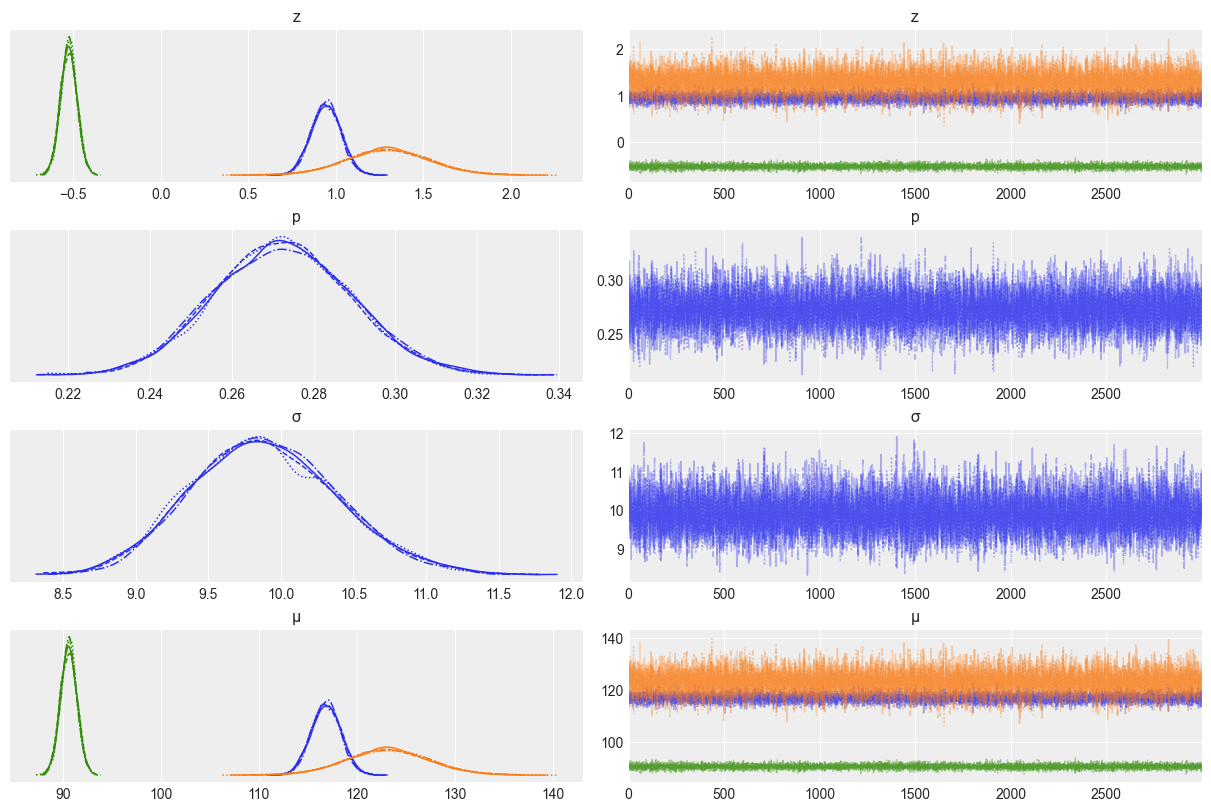

In [23]:
az.plot_trace(trace);

Видим, что оценка среднего для Магазина №1 (оранжевый) имеет большую дисперсию в сравнении с прочими. Это следсвие того, что Магазин №1 имеет меньше всего наблюдений (43)

In [24]:
data.store.value_counts()

store
2    534
0    124
1     43
Name: count, dtype: int64

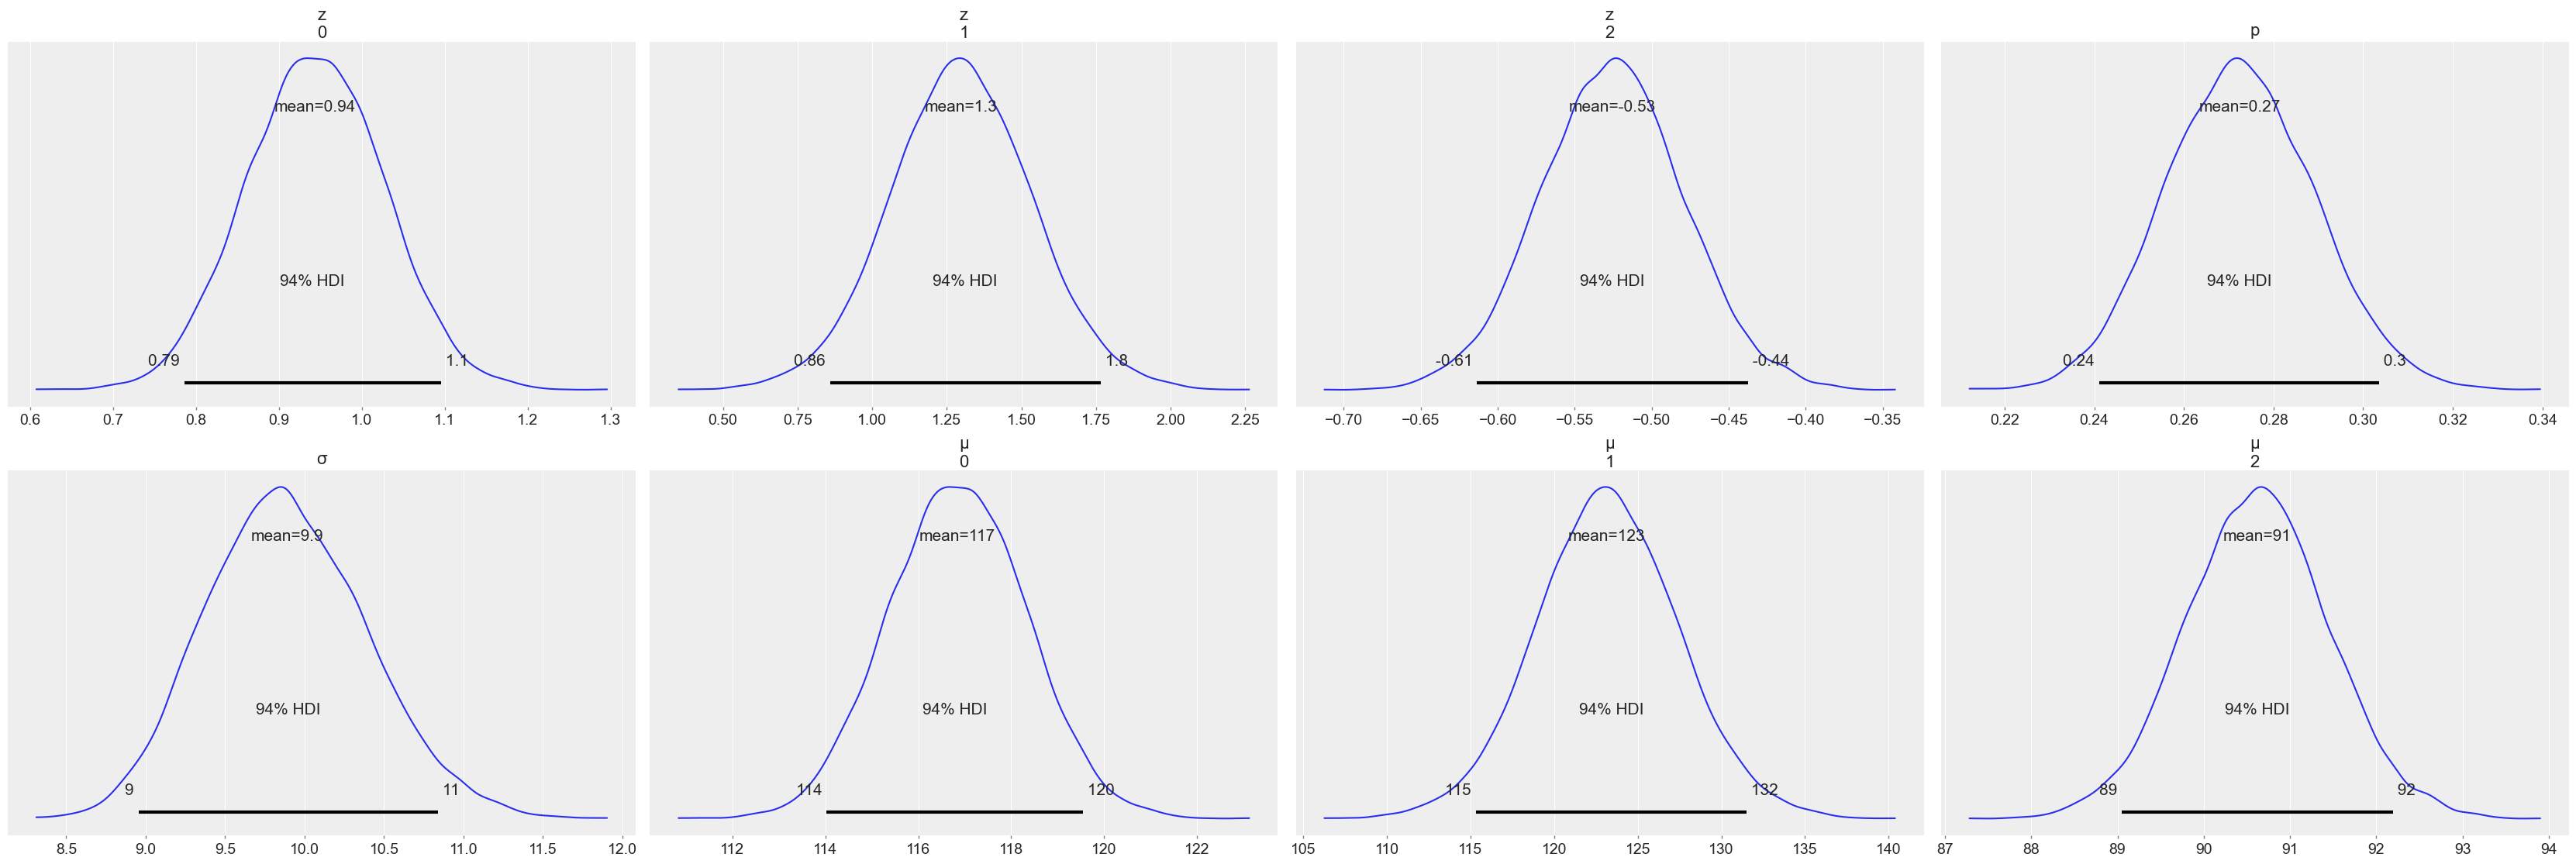

In [25]:
az.plot_posterior(trace);

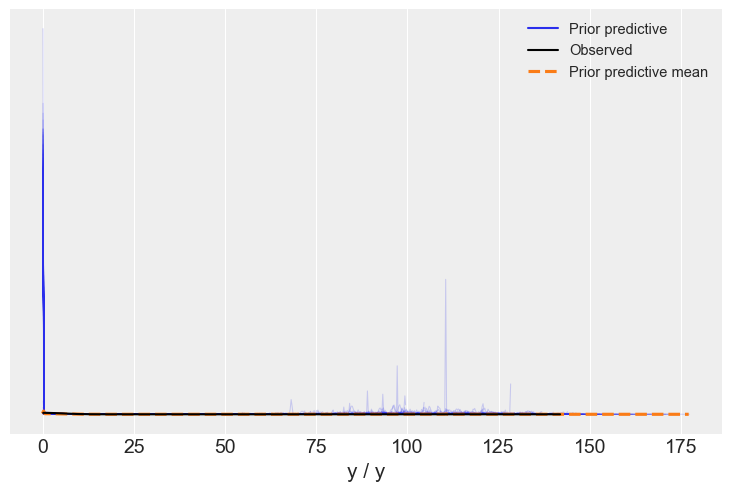

In [26]:
az.plot_ppc(trace, group='prior');

> Есть выбросы, наборы наблюдений, в которых наблюдается высокая доля отказа от покупки. Тем не менее среднее значение наблюдаемой переменной соотвесвует нашим ожиданиям. Среднее находится в районе 100 и не превышает 500. Посмотрим на средние значения 

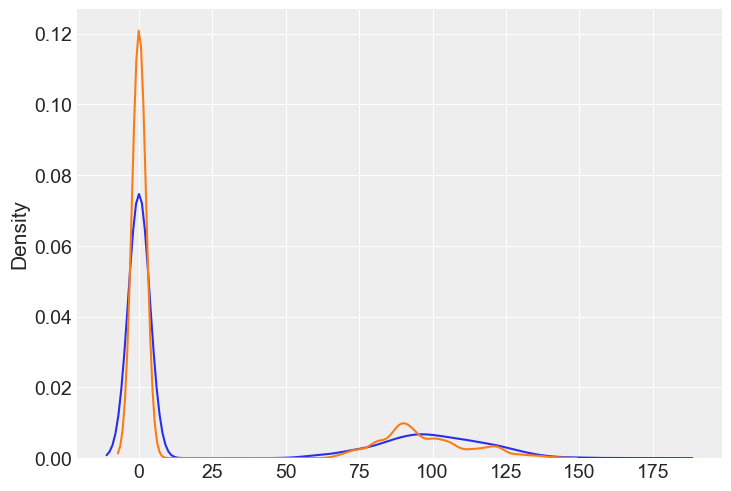

In [27]:
sns.kdeplot(trace.prior_predictive.y.to_numpy().ravel())
sns.kdeplot(np.repeat(trace.observed_data.y.to_numpy(), repeats=3000));

Распределения похожи, однако наблдается, более низкая доля отказа от покупок (в сравнении с наблюдаемыми данными)

In [28]:
trace.prior_predictive.y.min()

<xarray.DataArray 'y' ()>
array(0.)

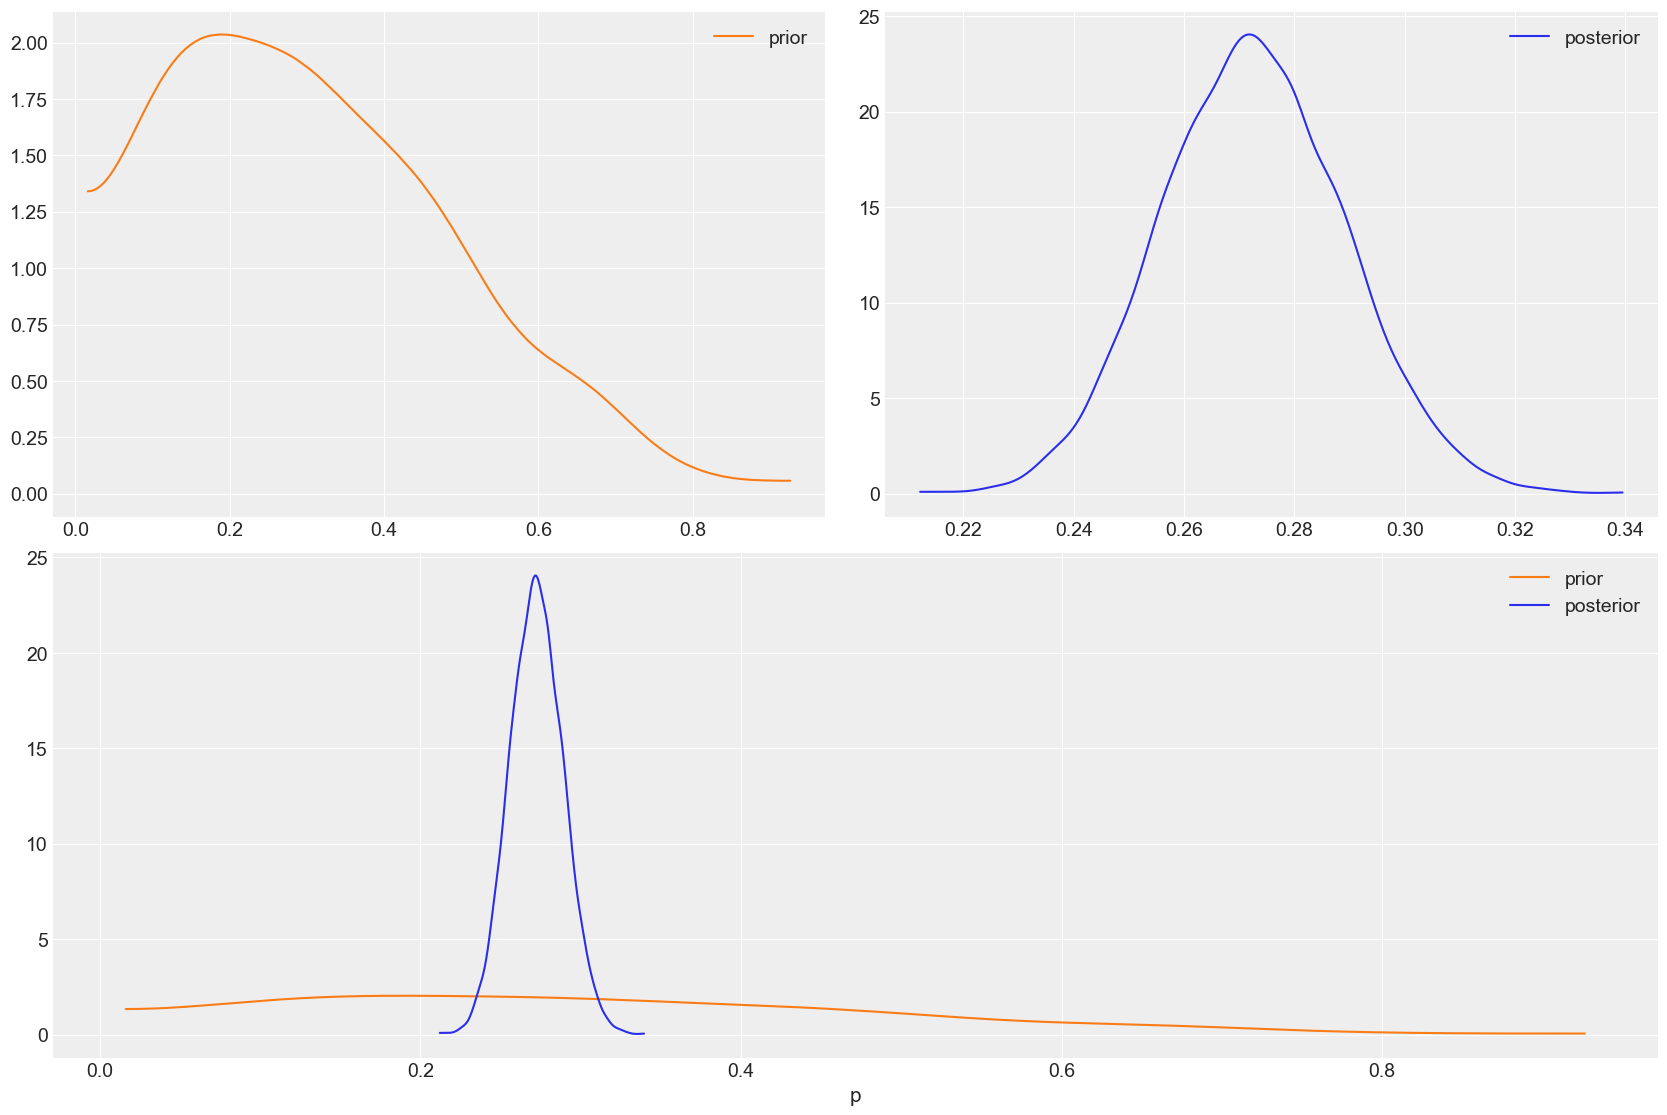

In [29]:
az.plot_dist_comparison(trace, var_names=['p']);

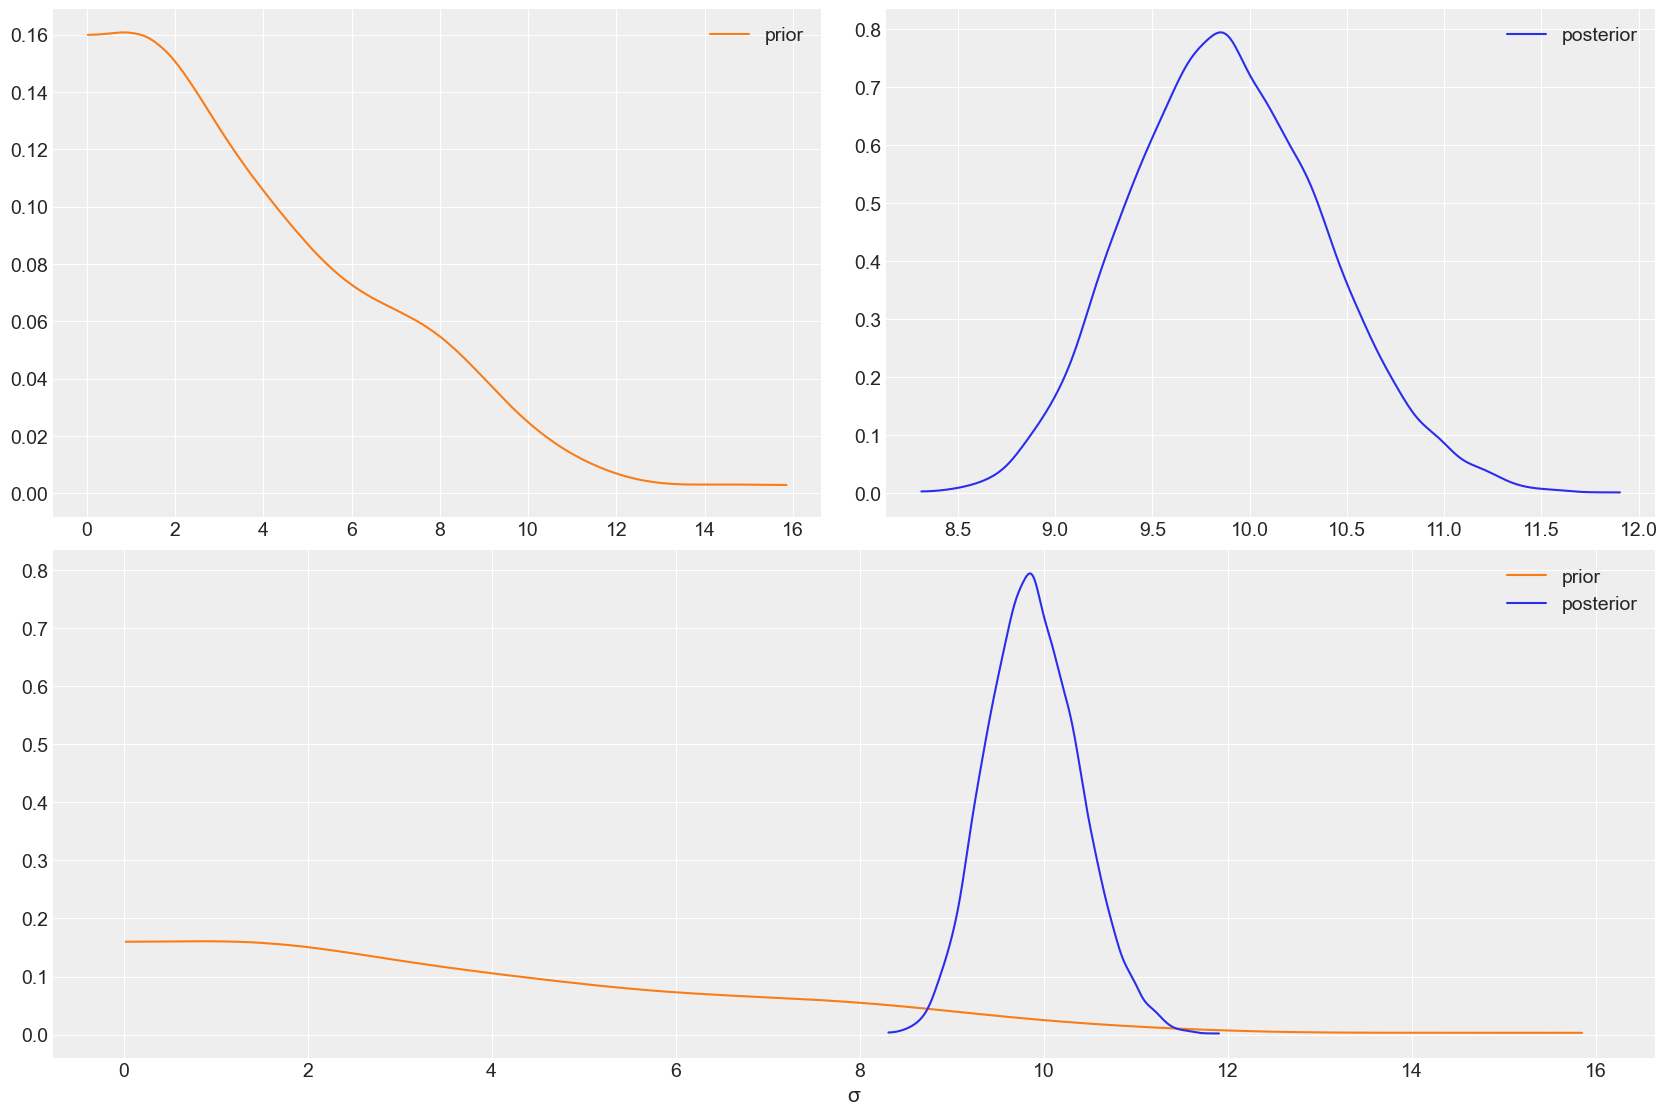

In [30]:
az.plot_dist_comparison(trace, var_names=['σ']);

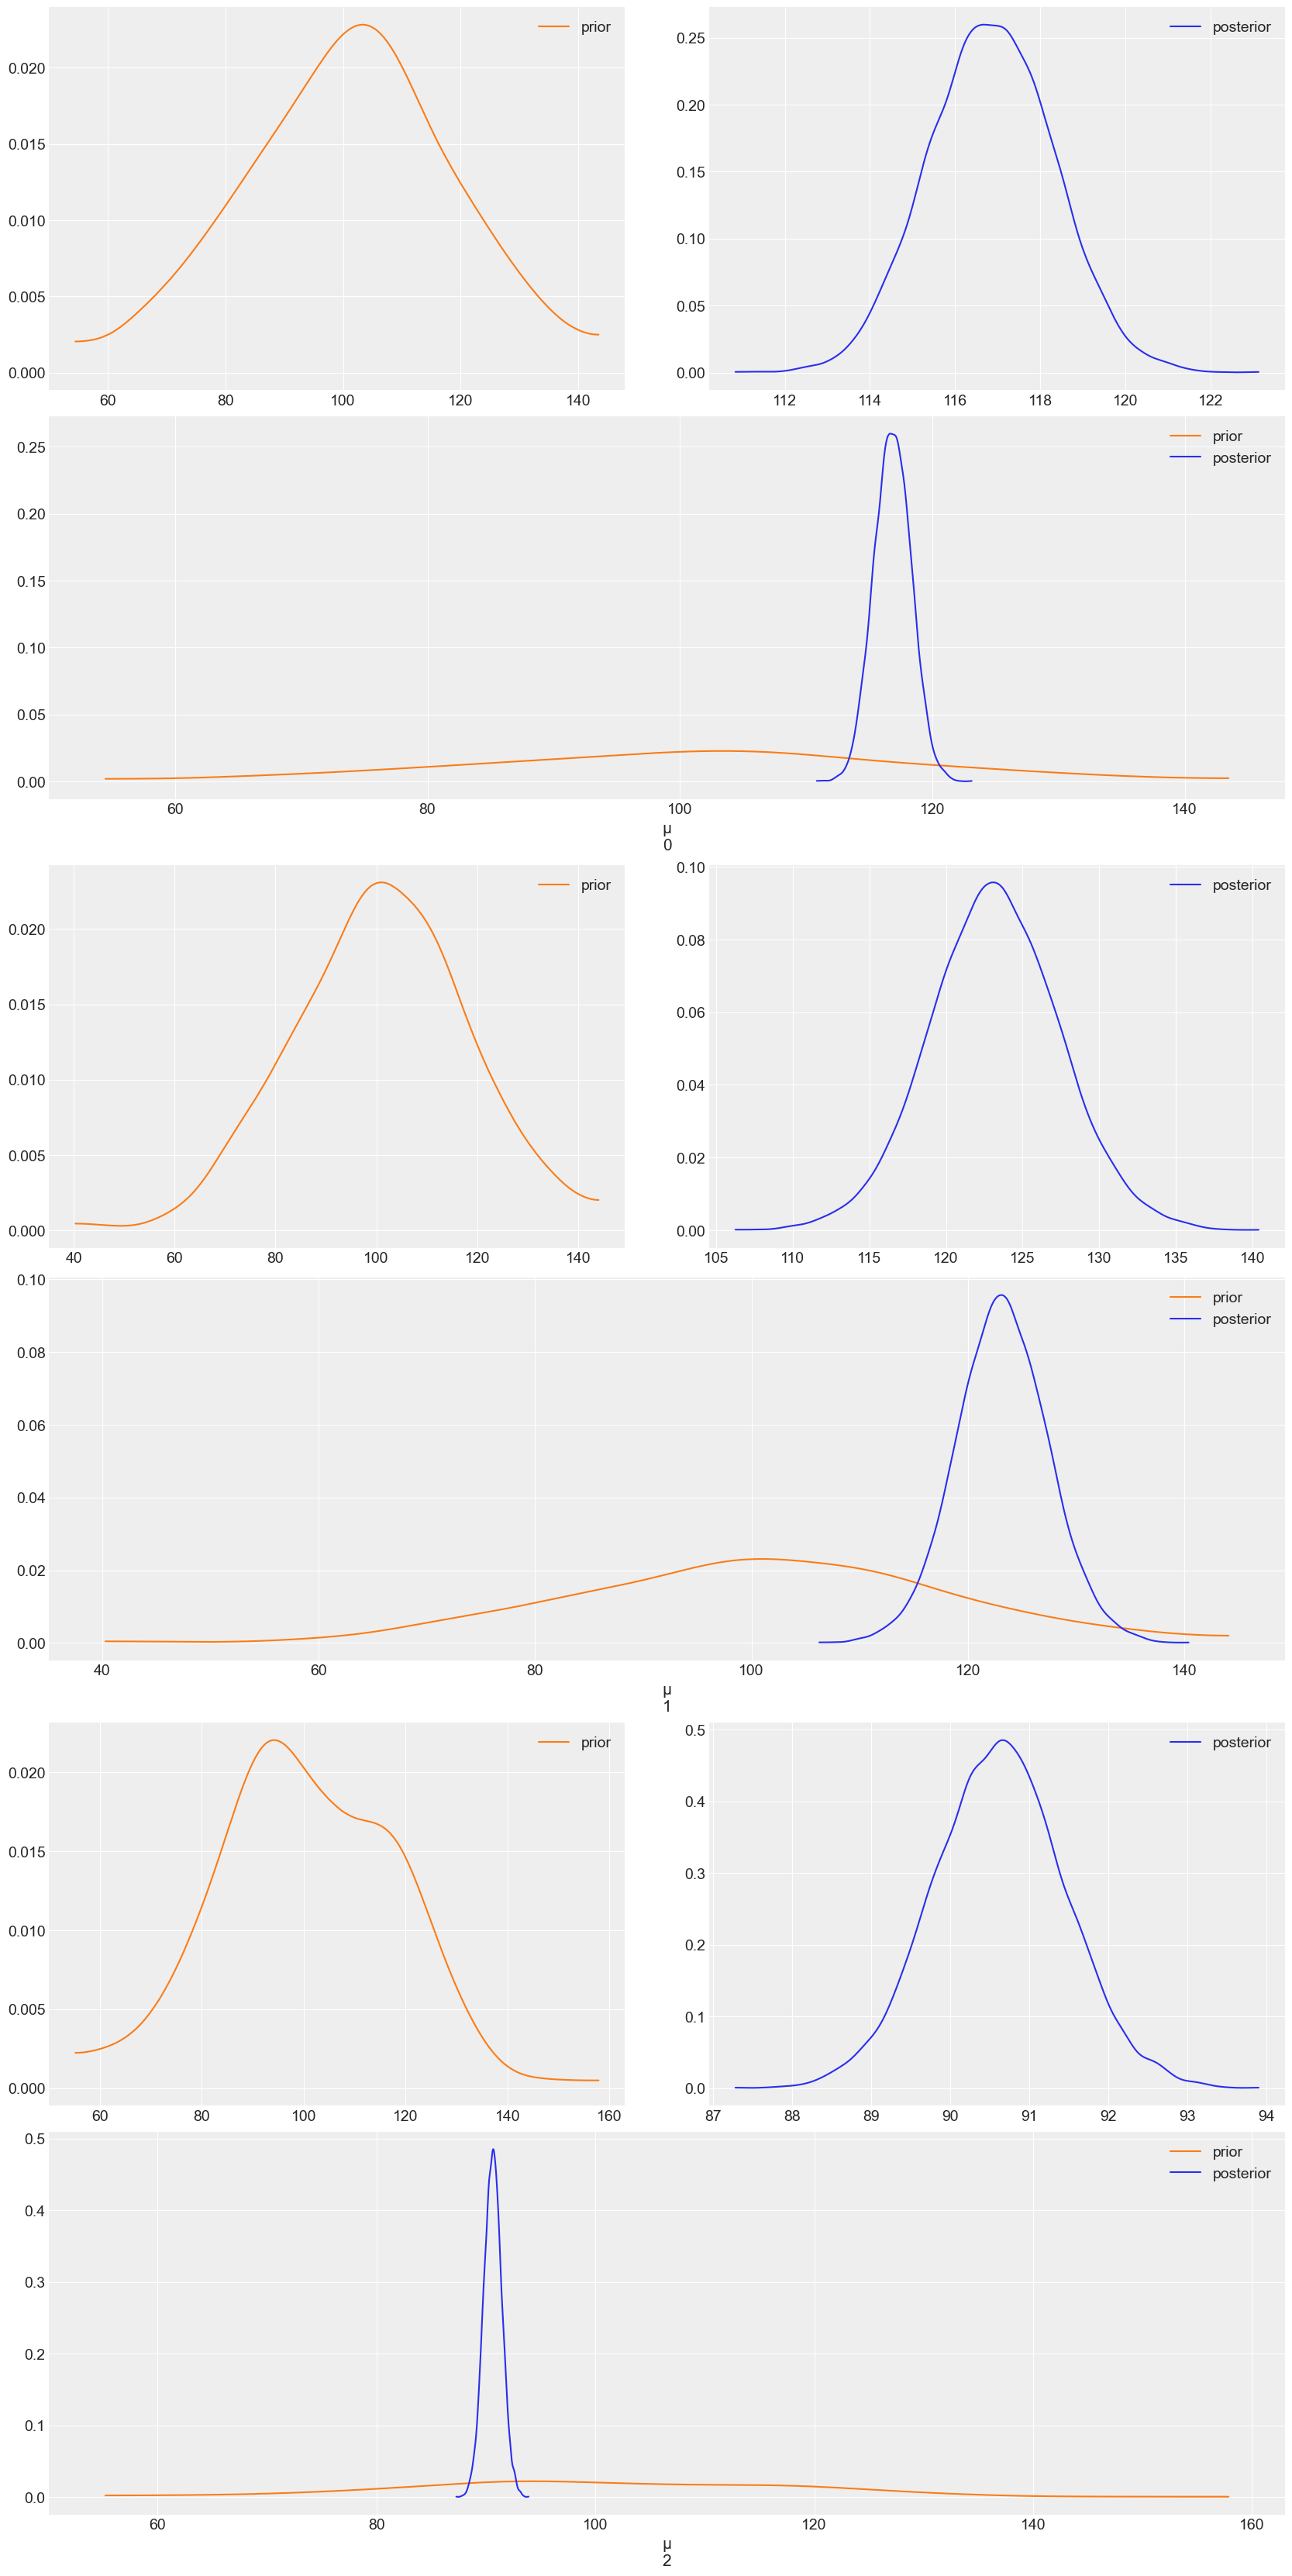

In [31]:
az.plot_dist_comparison(trace, var_names=['μ']);

> априорные и постериорные распределения пересекаются (этого достаточно). Различия в форме распределений обусловлены теми предпослыками, которые были выдвинуты в процессе подбора априорных распределений.

## 4. Hierarchical Model (2 parameters)
4. Propose a hierarchical model for the problem. Put hierarchy on 2 model parameters (you choose which additional one, prefer p)

**hint:**

For Hierarchical probs:

Use LogitNormal distribution (preferred)

1. simple to interpret
2. easier to parametrize (same you do normal dist but with a transform)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [z, p, σ]


Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 6 seconds.
Sampling: [p, y, z, σ]


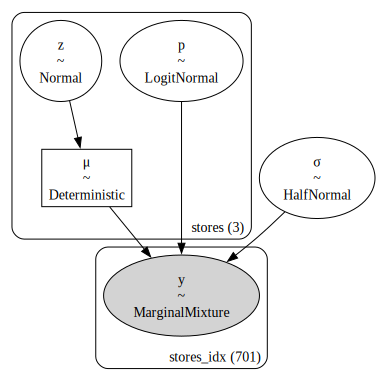

In [32]:
stores_idx, stores = pd.factorize(data.store)

with pm.Model(coords={'stores_idx': stores_idx, 'stores': stores}) as model_hierarchy_2_param:
    # other
    z = pm.Normal(name='z', mu=0, sigma=1, dims='stores')
    
    # vars
    p = pm.LogitNormal(name='p', mu=-1, sigma=1, dims='stores')
    μ = pm.Deterministic(name='μ', dims='stores', var=100 + z * data[data.obs != 0].groupby(by='store').obs.mean().std())
    σ = pm.HalfNormal(name='σ', sigma=5)
    
    # prior
    w = pt.stack([1 - p[stores_idx], p[stores_idx]], axis=1)
    a = pm.DiracDelta.dist(c=float(0))
    b = pm.Normal.dist(mu=μ[stores_idx], sigma=σ)
    
    # likelihood
    y = pm.Mixture(name='y', w=w, comp_dists=[a, b], observed=data.obs, dims='stores_idx', 
                   transform=pm.distributions.transforms.Interval(lower=0, upper=None))
    
    # posterior distribution
    trace = pm.sample(3000, random_seed=1234, target_accept=0.95, idata_kwargs={'log_likelihood': True})
    trace.extend(pm.sample_prior_predictive())
    trace.to_netcdf('trace_hierarchy_2_param.nc')
    traces['hierarchy_2_param'] = trace

pm.model_to_graphviz(model_hierarchy_2_param)

In [33]:
model_hierarchy_2_param

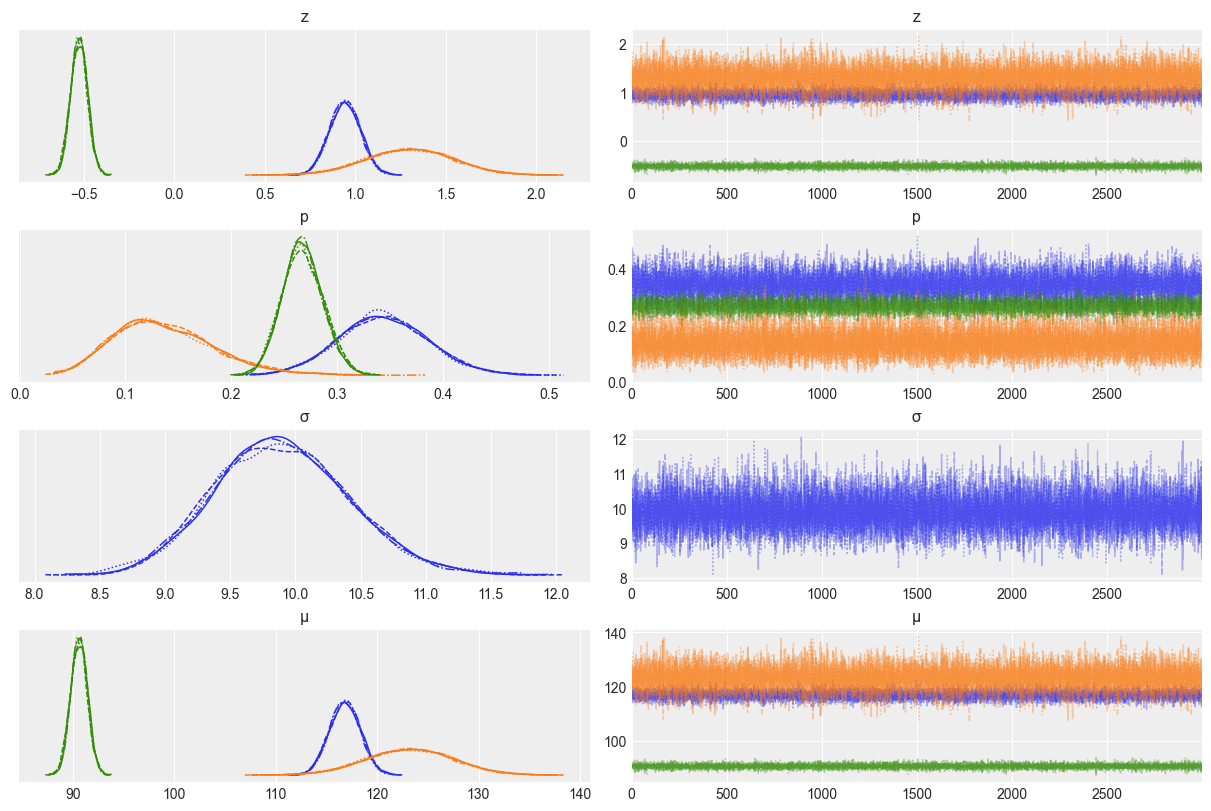

In [34]:
az.plot_trace(trace);

Видим, что оценка среднего для Магазина №1 (оранжевый) имеет большую дисперсию в сравнении с прочими. Это следсвие того, что Магазин №1 имеет меньше всего наблюдений (43)
Аналогичное утверждение справделиво также в отношении параметра вероятность покупки.

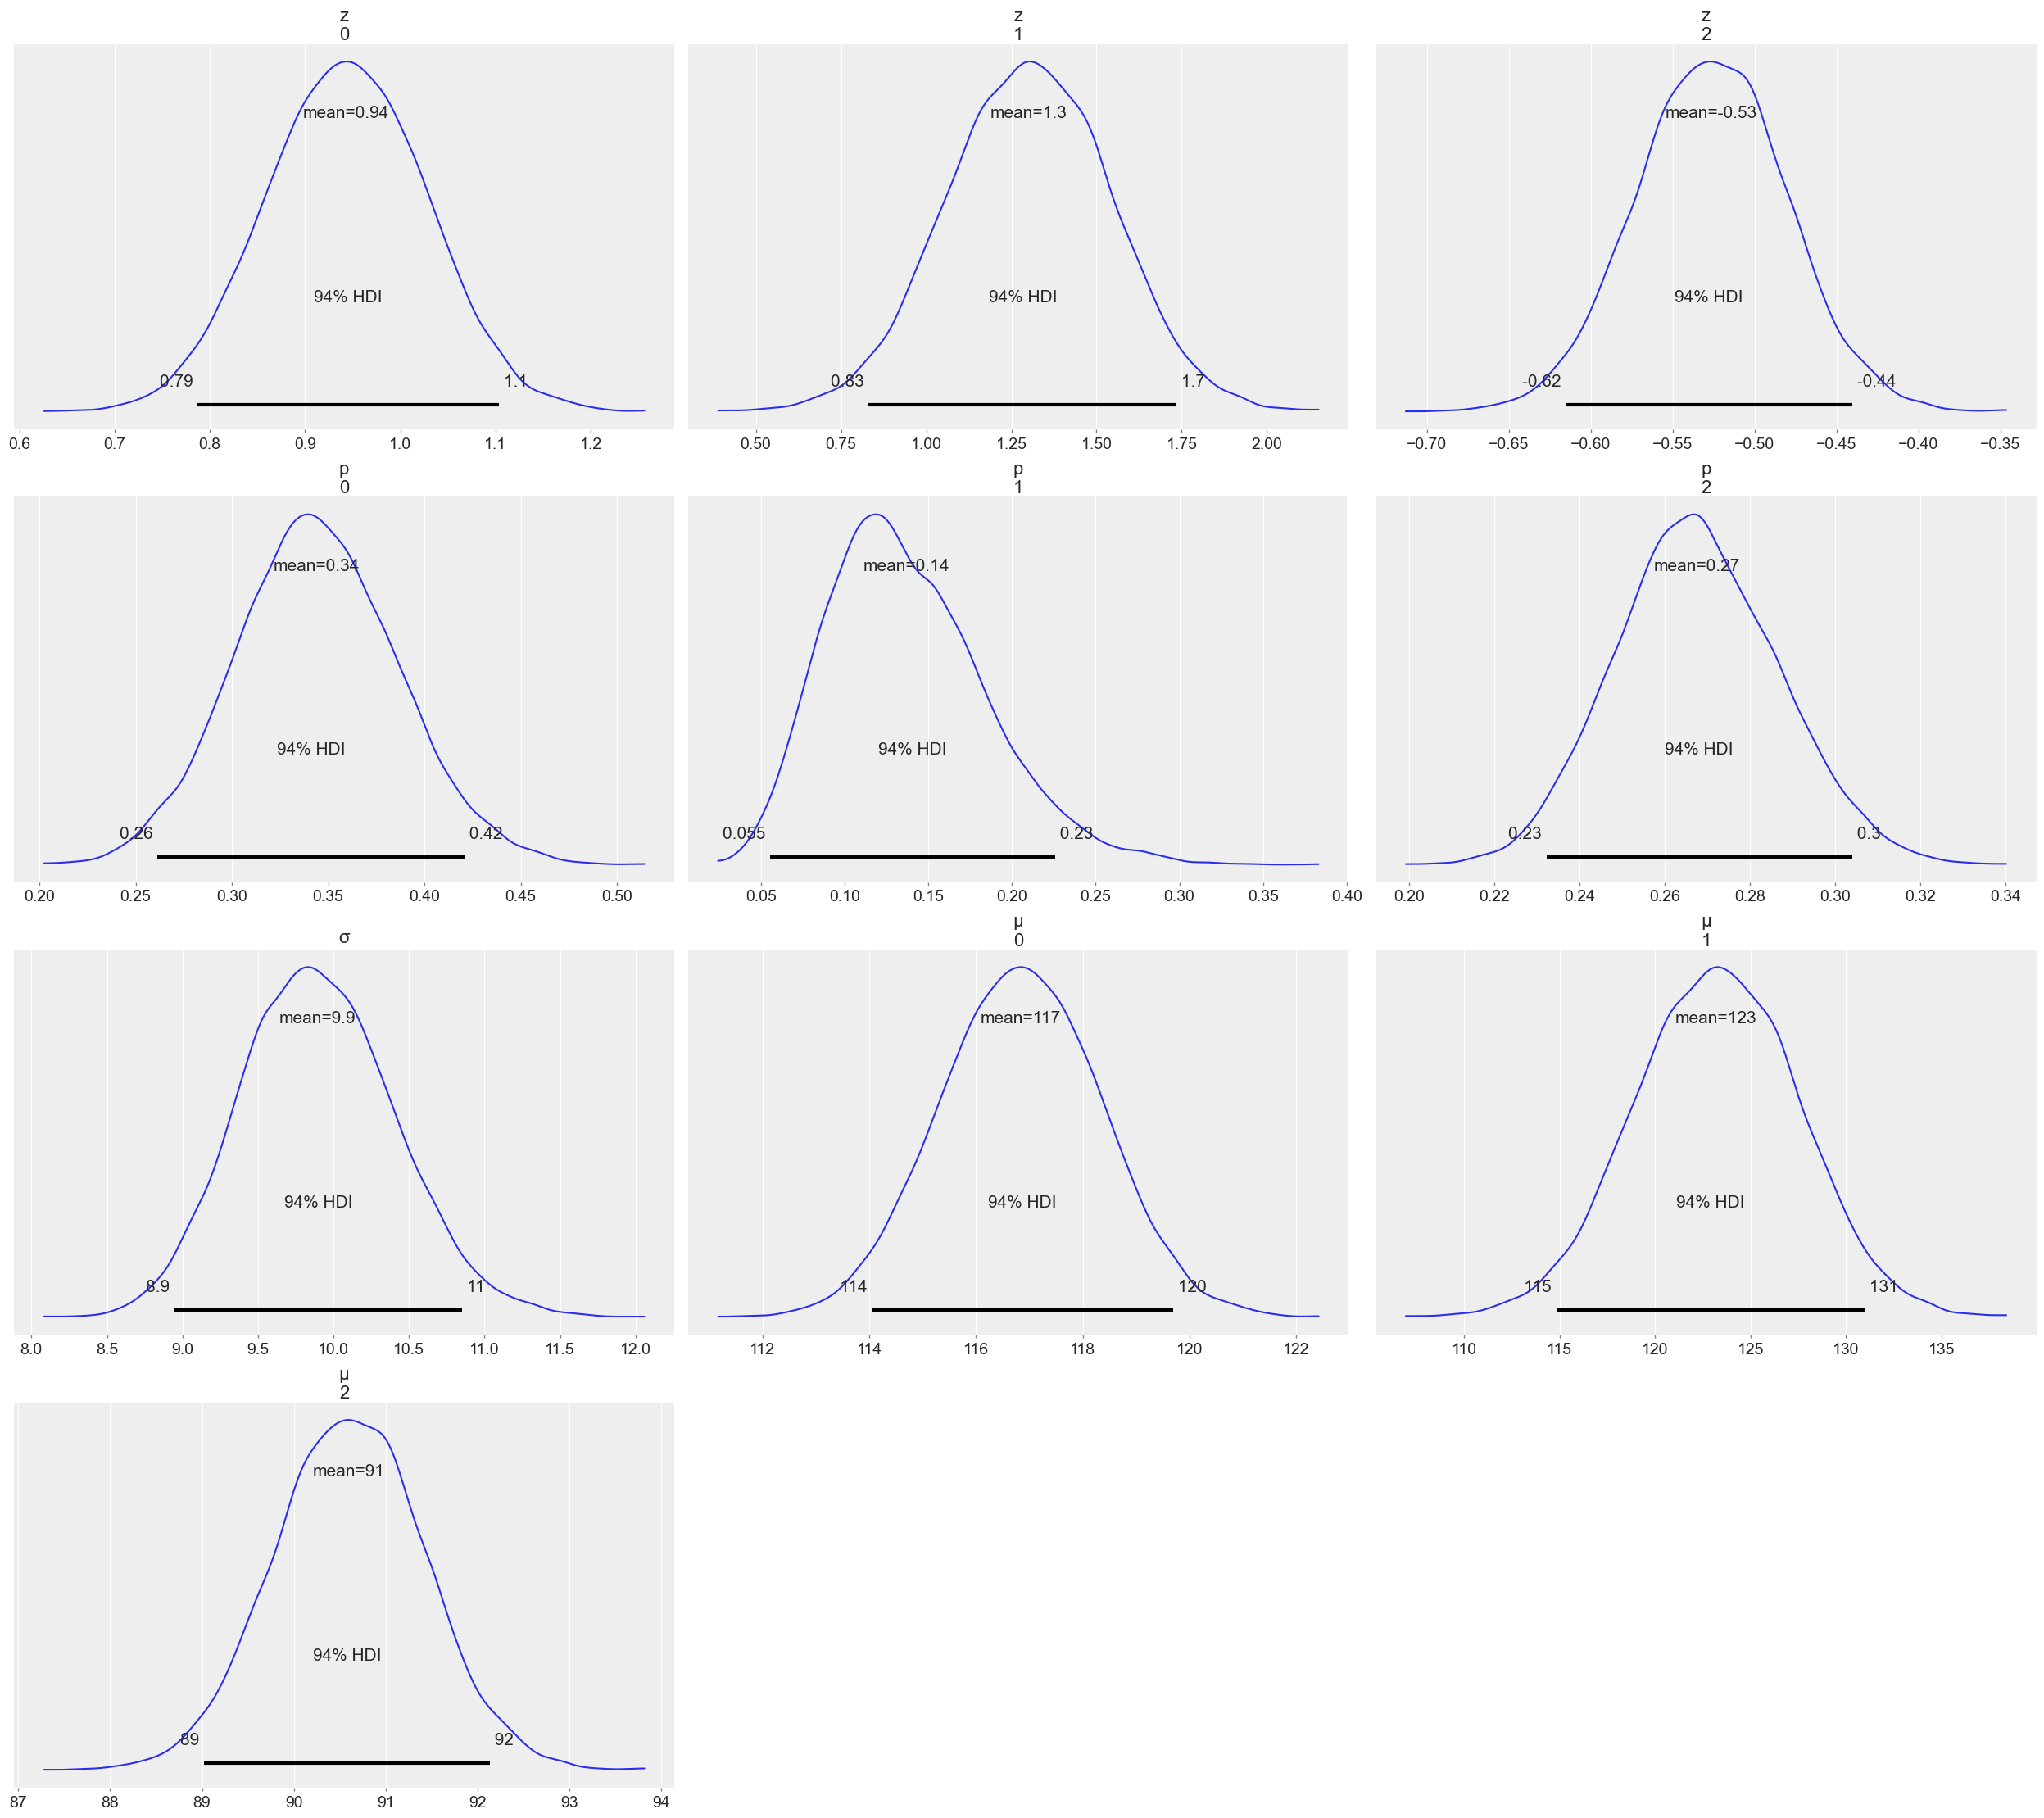

In [35]:
az.plot_posterior(trace);

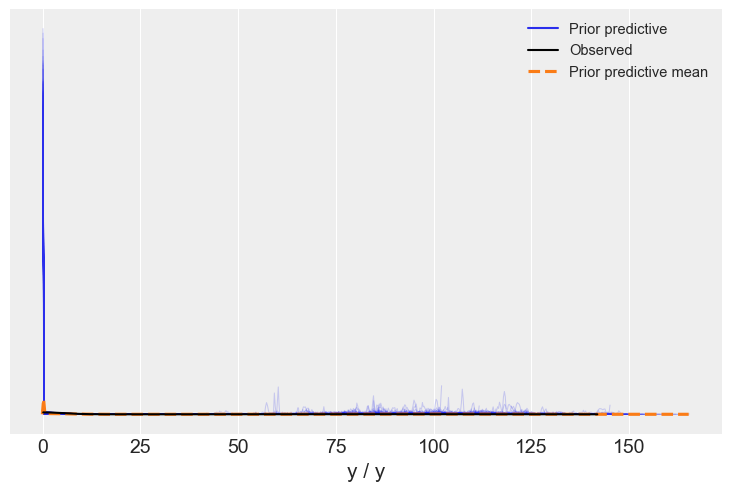

In [36]:
az.plot_ppc(trace, group='prior');

> Есть выбросы, наборы наблюдений, в которых наблюдается высокая доля отказа от покупки. Тем не менее среднее значение наблюдаемой переменной соотвесвует нашим ожиданиям. Среднее находится в районе 100 и не превышает 500. Посмотрим на средние значения 

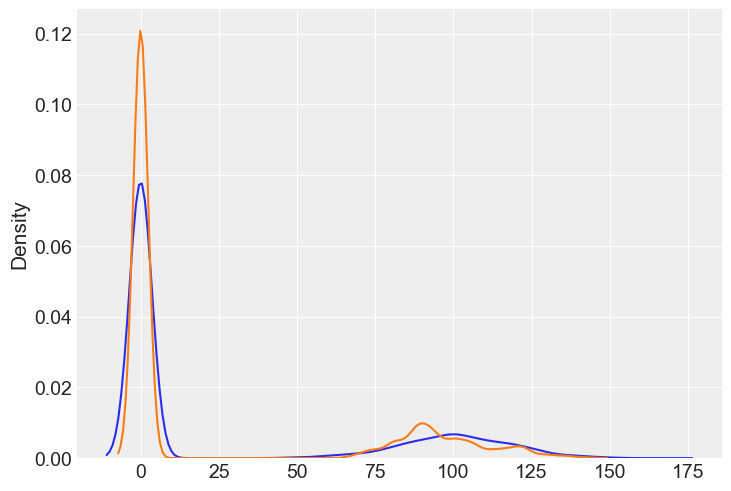

In [37]:
sns.kdeplot(trace.prior_predictive.y.to_numpy().ravel())
sns.kdeplot(np.repeat(trace.observed_data.y.to_numpy(), repeats=3000));

Распределения похожи, однако наблдается, более низкая доля отказа от покупок (в сравнении с наблюдаемыми данными)

In [38]:
trace.prior_predictive.y.min()

<xarray.DataArray 'y' ()>
array(0.)

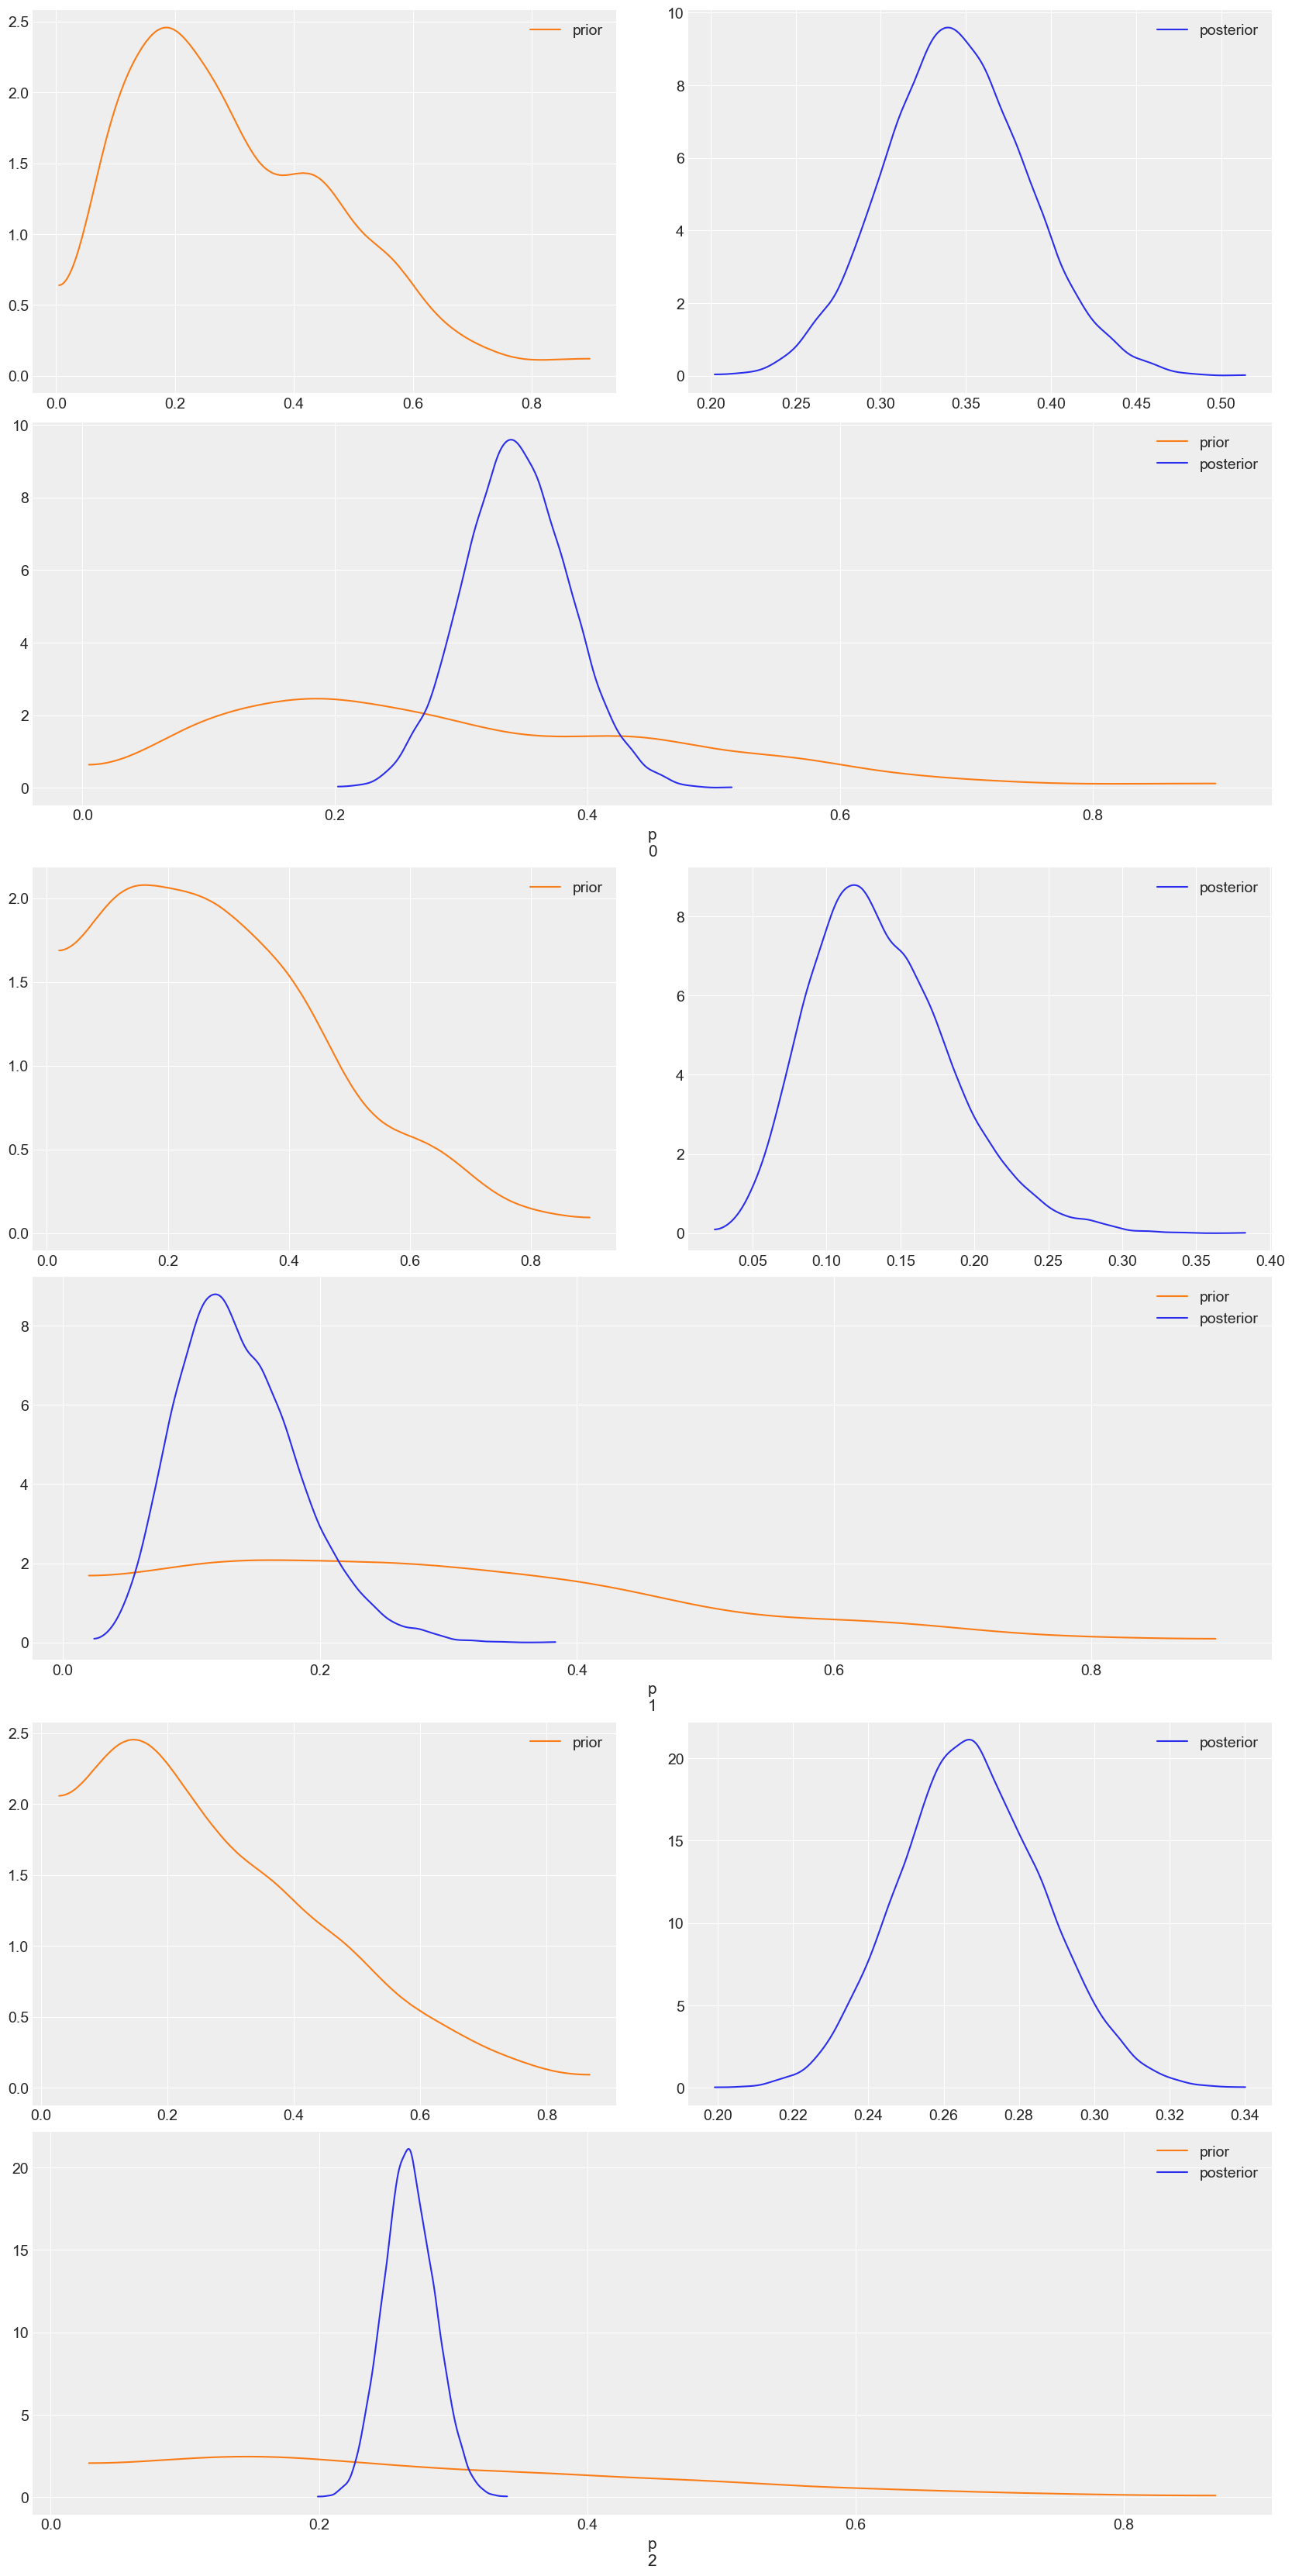

In [39]:
az.plot_dist_comparison(trace, var_names=['p']);

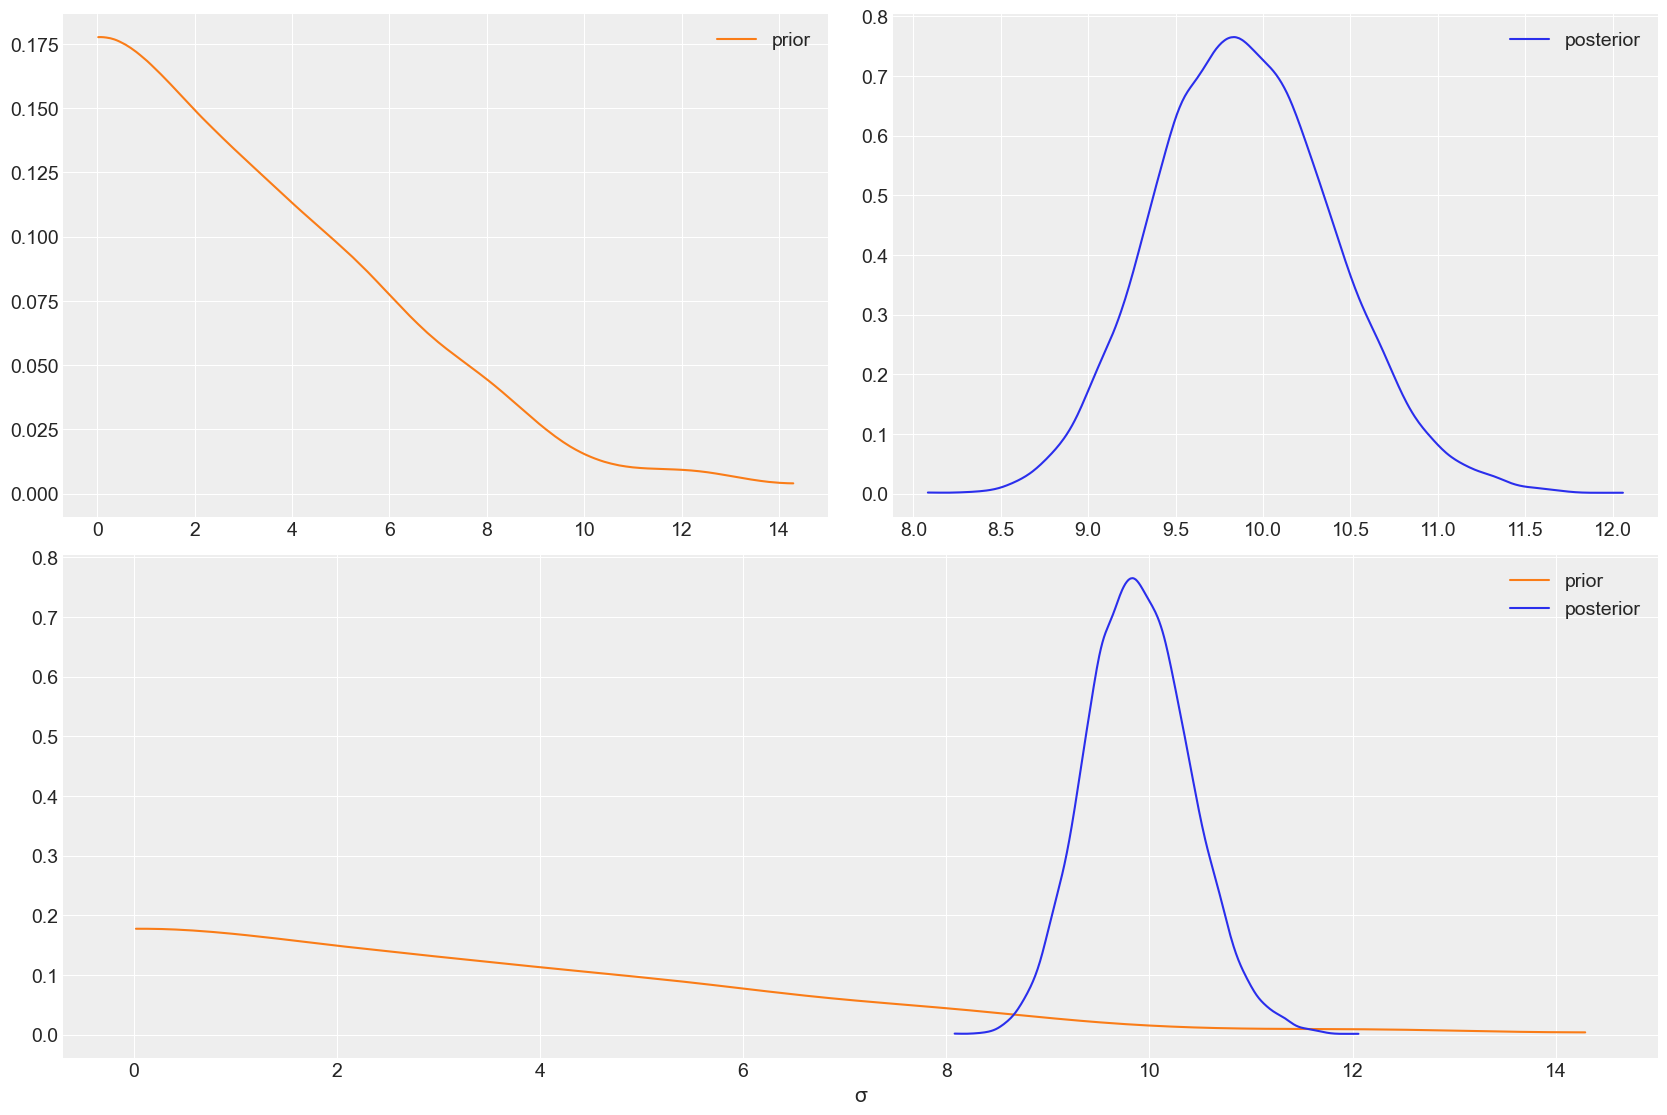

In [40]:
az.plot_dist_comparison(trace, var_names=['σ']);

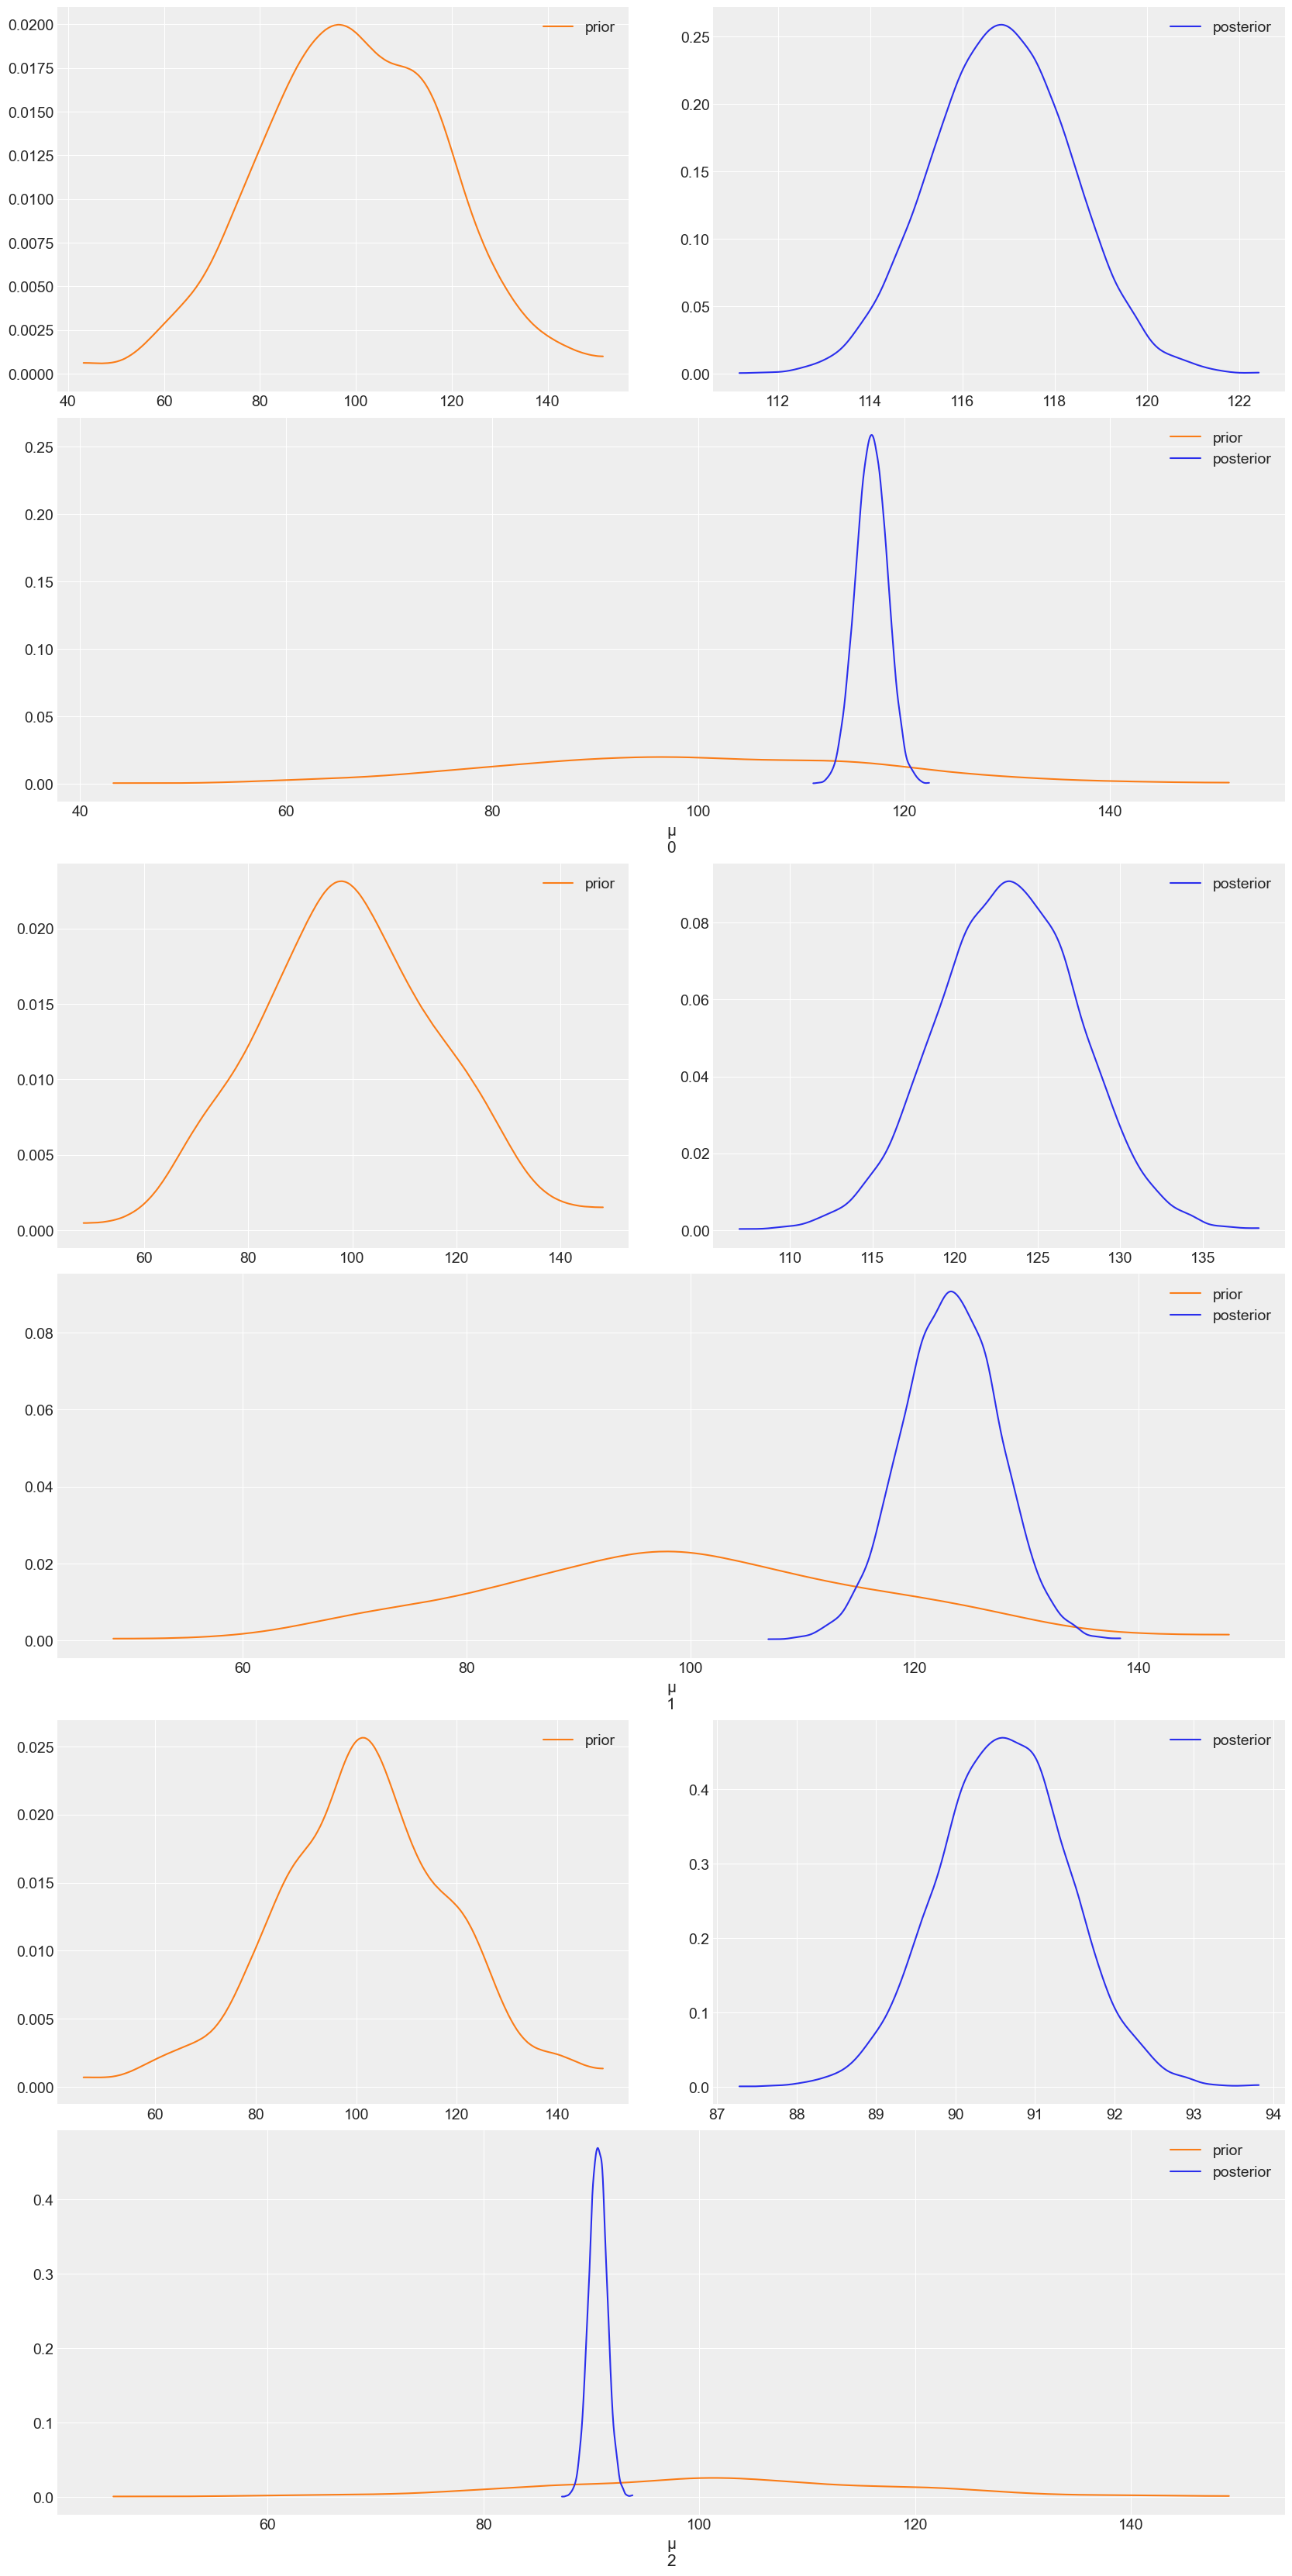

In [41]:
az.plot_dist_comparison(trace, var_names=['μ']);

> априорные и постериорные распределения пересекаются (этого достаточно). Различия в форме распределений обусловлены теми предпослыками, которые были выдвинуты в процессе подбора априорных распределений.

## 5. Model Comparison study

5. Perform a model comparison study (look into az.compare)

    1. Interpret the result and choose the best model
    2. Elaborate on Warnings, if there are any

In [42]:
import warnings; warnings.filterwarnings('ignore', module='arviz')

az.compare(compare_dict=traces)

rank     elpd_loo     p_loo  elpd_diff    weight  \
hierarchy_2_param     0 -1120.891958  7.121005   0.000000  0.877578   
hierarchy_1_param     1 -1123.808149  5.318748   2.916190  0.122422   
no_hierarchy          2 -1206.863101  2.918456  85.971143  0.000000   

                          se        dse  warning scale  
hierarchy_2_param  56.276801   0.000000    False   log  
hierarchy_1_param  56.322740   2.732785    False   log  
no_hierarchy       61.485710  11.860193    False   log

> Сравним модели и сделаем выбор в пользу модели с наименьшей стандартной ошибкой. У модели `hierarchy_2_param` стандартная ошибка наименьшая, выберем ее.

6. (5 pt) Business Metric (bonus)
    1. Propose and motivate a comparison metric between groceries to say (A is better than B)
    2. Evaluate the metric on the the best model you have
  

Предложим показатель ожидаемой суммы покупки: $\mu * p$

In [43]:
with model_hierarchy_2_param:
    metric = pm.Deterministic(name='metric', var=μ * p)
    trace = pm.sample(3000, random_seed=1234, target_accept=0.95, idata_kwargs={'log_likelihood': True})

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [z, p, σ]


Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 6 seconds.


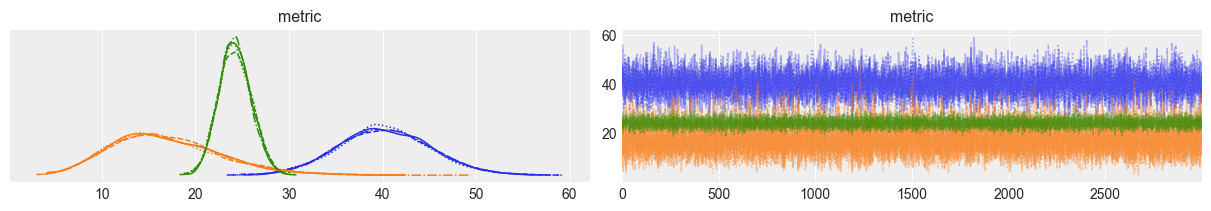

In [44]:
az.plot_trace(trace, var_names=['metric']);

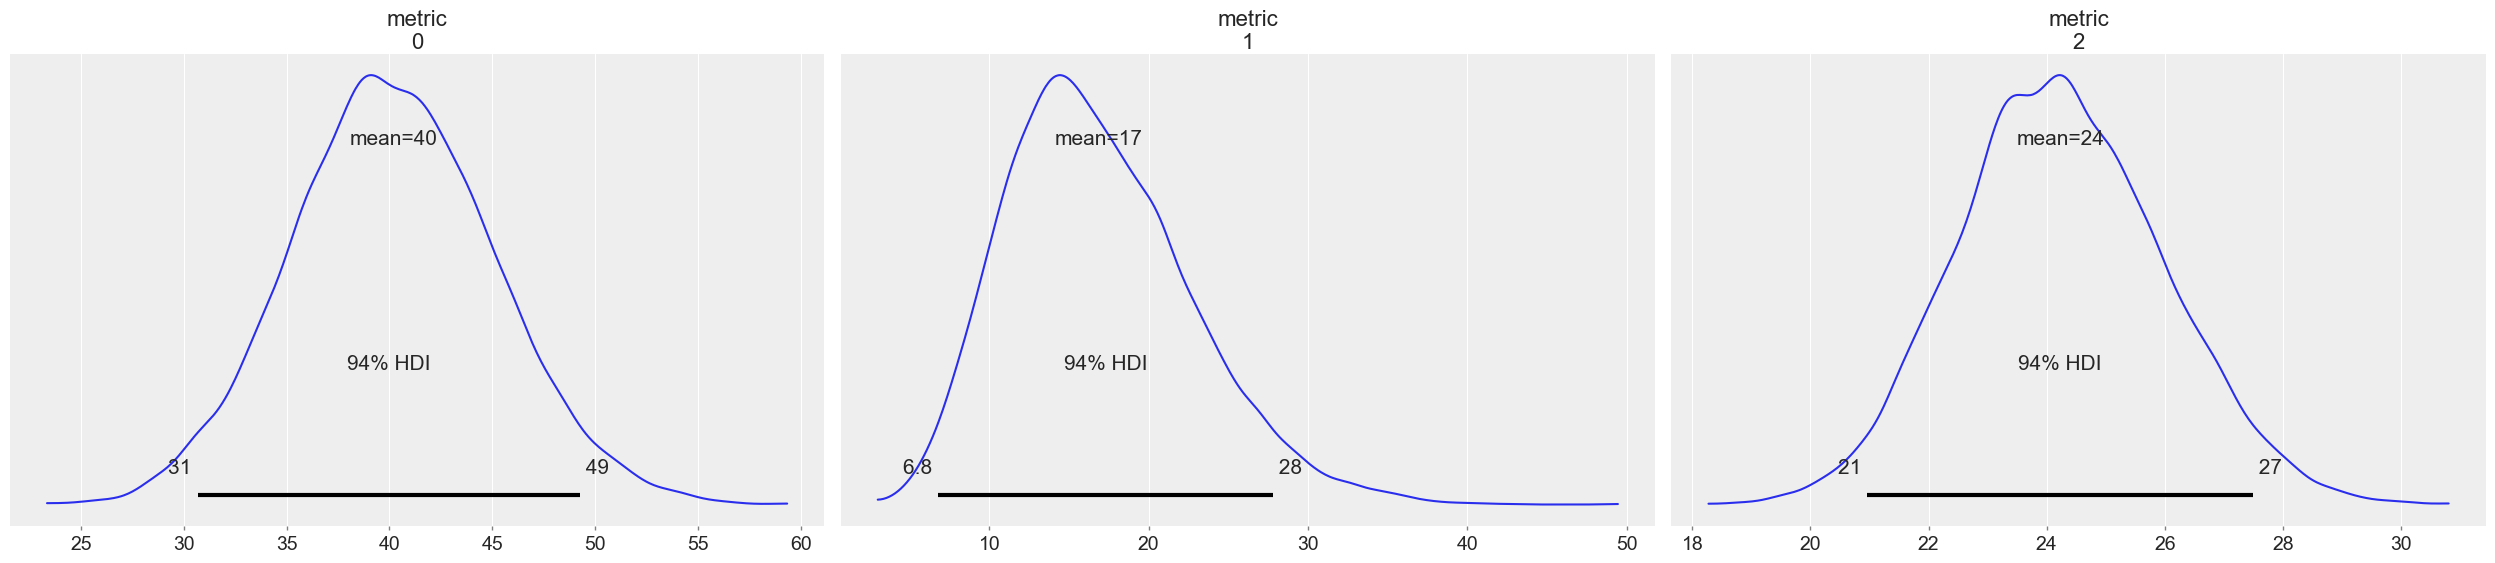

In [45]:
az.plot_posterior(trace, var_names=['metric']);

Магазин №1 хуже Магазина №2. Магазин №2 хуже Магазина №0.